*   Course: IST 718
*   Authors: Sathish Kumar Rajediran
*   Task: Lab 1
*   Task Item: Best Salary Recommendation fo Syracuse Head Football Coach
*   Date: April 19,2021

## Objective
This case study provides an opportunity to demonstrate our ability to combine datasets and produce meaningful analysis. Specifically, we would like to provide a decision maker with more than just data—we want to provide insights, understanding, and wisdom. This exercise allows the student an opportunity to demonstrate progress (or mastery) of learning objectives 1, 2, 3, 4, and 5.
* 1) Obtain data and understand data structures and data elements.
* 2) Scrub data using scripting methods, to include debugging, for data manipulation in R and other tools.
* 3) Explore data using essential qualitative analysis techniques, including descriptive statistics.
* 4) Model relationships between data using the appropriate analytical methodologies matched to the information and the needs of clients and users.
* 5) Interpret the data, model, analysis, and findings, and communicate the results in a meaningful way.

## Instructions
 The research question is, how can we recommend the best salary (total compensation, minus bonus) for our next head football coach?
* Start with the data Coaches.
* Review the data—clean as appropriate.
* Consider the base worksheet and the additional data.
   * Stadium size
   * Graduation rate:
   * Available from http://fs.ncaa.org/Docs/newmedia/public/rates/index.html
   * Use the 2006 cohort and include both GSR and FGR
   * Annual donations to program (if available)
* Develop an additional vector for each school using last year’s record.
* Build a data frame for your analysis.
* Conduct an initial data analysis.
* Fit a regression model with the salary as the response and the relevant predictors (i.e., you will need more than one predictor).
* Answer the following questions in your report:
   * What is the recommended salary for the Syracuse football coach?
   * What would his salary be if we were still in the Big East? What if we went to the Big Ten?
   * What schools did we drop from our data, and why?
   * What effect does graduation rate have on the projected salary?
   * How good is our model?
   * What is the single biggest impact on salary size?
* Bonus:
   * Develop a geographic visualization that in your view best depicts the conferences’ median salary.
   * Fit a hierarchical model based on conference.
* Double bonus:
   * Using some additional materials—https://apsportal.ibm.com/analytics—recreate your code for the basic regression model with a training and test set, but do not use conference as a predictor.
   
## Additional Instructions
* Don’t forget what you learned in your previous courses; do your own work, document any assistance, and use comments for clarity.

## Submission Items
* Case study report with data analysis, graphics, and answers to specific questions
* Supporting notebook for the report—be sure to include comments regarding how you combined additional data into your analysis

In [1]:
!pip install fuzzywuzzy

In [2]:
pwd

'/Users/sathishrajendiran/ist718-python/Labs/Lab1'

In [3]:
# ***********************************************************************************
#      import libraries
# ***********************************************************************************

# standard library
import os
import sys
from datetime import datetime
import time
import timeit


# import packages for analysis and modeling
import pandas as pd  # data frame operations
from fuzzywuzzy import fuzz, process
import numpy as np  # arrays and math functions

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

from scipy.stats import uniform  # for training-and-test split
import matplotlib.pyplot as plt  # 2D plotting

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

print('Libraries imported successfully!\n')

os.getcwd()

/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Libraries imported successfully!



'/Users/sathishrajendiran/ist718-python/Labs/Lab1'

In [4]:
ls

Coaches9.csv                         cb_2018_us_state_20m.cpg
CollegeRank.csv                      cb_2018_us_state_20m.dbf
CollegeRecords.csv                   cb_2018_us_state_20m.prj
GraduationRates.csv                  cb_2018_us_state_20m.shp
Rajendiran_Lab1-Copy1.ipynb          cb_2018_us_state_20m.shp.ea.iso.xml*
Rajendiran_Lab1.ipynb                cb_2018_us_state_20m.shp.iso.xml*
Rajendiran_Week2_Sync.ipynb          cb_2018_us_state_20m.shx
SchoolsData.xls                      fipsData.xls
Stadiums.csv                         fips_data.xls
StatesInfo.csv


In [5]:
# Show all columns and do not truncate in the data frame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [6]:
# ***********************************************************************************
#       Working with files  
# ***********************************************************************************

# Read the csv files into dataframes

# !pwd

fpath = "/Users/sathishrajendiran/ist718-python/Labs/Lab1/"

try: 
    Coaches = pd.read_csv(fpath + "Coaches9.csv")
    print('Coaches data - Total Number of rows Processed: ',len(Coaches))
except:
    print("Is the file in correct directory?")
    

# ***********************************************************************************
#       External data 
# ***********************************************************************************

# Read the csv files into dataframes


try: 
    CollegeRank = pd.read_csv(fpath + "CollegeRank.csv")
    print('CollegeRank data - Total Number of rows Processed: ',len(CollegeRank))
except:
    print("Is the file in correct directory?")
    
    
try: 
    CollegeRecords = pd.read_csv(fpath + "CollegeRecords.csv")
    print('CollegeRecords data - Total Number of rows Processed: ',len(CollegeRecords))
except:
    print("Is the file in correct directory?")
    
    
try: 
    GraduationRates = pd.read_csv(fpath + "GraduationRates.csv")
    print('GraduationRates data - Total Number of rows Processed: ',len(GraduationRates))
except:
    print("Is the file in correct directory?")
    

try: 
    Stadiums = pd.read_csv(fpath + "Stadiums.csv")
    print('Stadiums data - Total Number of rows Processed: ',len(Stadiums))
except:
    print("Is the file in correct directory?")

try: 
    Schools = pd.read_excel(fpath + "SchoolsData.xls")
    print('Schools data - Total Number of rows Processed: ',len(Schools))
except:
    print("Is the file in correct directory?")
    

try: 
    StatesInfo = pd.read_csv(fpath + "StatesInfo.csv")
    print('StatesInfo data - Total Number of rows Processed: ',len(StatesInfo))
except:
    print("Is the file in correct directory?")
    


Coaches data - Total Number of rows Processed:  129
CollegeRank data - Total Number of rows Processed:  25
CollegeRecords data - Total Number of rows Processed:  130
GraduationRates data - Total Number of rows Processed:  249
Stadiums data - Total Number of rows Processed:  130
Schools data - Total Number of rows Processed:  350
StatesInfo data - Total Number of rows Processed:  50


In [7]:
print(Coaches.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   School        129 non-null    object
 1   Conference    129 non-null    object
 2   Coach         129 non-null    object
 3   SchoolPay     129 non-null    object
 4   TotalPay      129 non-null    object
 5   Bonus         129 non-null    object
 6   BonusPaid     129 non-null    object
 7   AssistantPay  129 non-null    object
 8   Buyout        129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB
None


In [8]:
Coaches.head()

,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout
0,Air Force,Mt. West,Troy Calhoun,885000,885000,247000,--,$0,--
1,Akron,MAC,Terry Bowden,"$411,000","$412,500","$225,000","$50,000",$0,"$688,500"
2,Alabama,SEC,Nick Saban,"$8,307,000","$8,307,000","$1,100,000","$500,000",$0,"$33,600,000"
3,Alabama at Birmingham,C-USA,Bill Clark,"$900,000","$900,000","$950,000","$165,471",$0,"$3,847,500"
4,Appalachian State,Sun Belt,Scott Satterfield,"$712,500","$712,500","$295,000","$145,000",$0,"$2,160,417"


In [9]:
#drop SchoolPay as its a almost same as TotalPay column
Coaches.drop("SchoolPay",axis=1,inplace=True)
Coaches.drop("AssistantPay",axis=1,inplace=True)
Coaches.drop("BonusPaid",axis=1,inplace=True)
Coaches.drop("Buyout",axis=1,inplace=True)
# Coaches.drop("Bonus",axis=1,inplace=True)

In [10]:
# summary statistics
summary = Coaches.describe()
summary.head()

,School,Conference,Coach,TotalPay,Bonus
count,129,129,129,129,129
unique,129,11,129,105,85
top,Maryland,SEC,Pat Narduzzi,"$3,500,000",--
freq,1,14,1,5,22


In [11]:
# function to clean currency values
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', '').replace('--', '0'))
    return(x)

In [12]:
#clean currency values
Coaches["TotalPay"] = Coaches["TotalPay"].apply(clean_currency).astype('float')
Coaches["Bonus"] = Coaches["Bonus"].apply(clean_currency).astype('float')
# Coaches["BonusPaid"] = Coaches["BonusPaid"].apply(clean_currency).astype('float')
# Coaches["Buyout"] = Coaches["Buyout"].apply(clean_currency).astype('float')

In [13]:
#display any columns with value as 0
Coaches.loc[(Coaches==0).any(axis=1)]

,School,Conference,Coach,TotalPay,Bonus
9,Army,Ind.,Jeff Monken,932521.0,0.0
12,Baylor,Big 12,Matt Rhule,0.0,0.0
14,Boston College,ACC,Steve Addazio,2514859.0,0.0
16,Brigham Young,Ind.,Kalani Sitake,0.0,0.0
28,Duke,ACC,David Cutcliffe,2540928.0,0.0
50,Liberty,Ind.,Turner Gill,947281.0,0.0
60,Miami (Fla.),ACC,Mark Richt,4058061.0,0.0
69,Navy,AAC,Ken Niumatalolo,2163000.0,0.0
79,Northwestern,Big Ten,Pat Fitzgerald,3619775.0,0.0
80,Notre Dame,Ind.,Brian Kelly,2129638.0,0.0


In [14]:
#remove rows with all columns having 0 values
Coaches = Coaches[(Coaches.sum(axis=1)!=0)]


In [15]:
print(Coaches.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 128
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   School      125 non-null    object 
 1   Conference  125 non-null    object 
 2   Coach       125 non-null    object 
 3   TotalPay    125 non-null    float64
 4   Bonus       125 non-null    float64
dtypes: float64(2), object(3)
memory usage: 5.9+ KB
None


In [16]:
#Raname column names / StatesInfo
Schools.columns = ['SchoolName','School','Team','City','StateName','Type','Enrollment','PrimaryConference']

#clean currency values
Schools["Enrollment"] = Schools["Enrollment"].apply(clean_currency).astype('int')

# Schools.head()

In [17]:
#Raname column names / StatesInfo
StatesInfo.columns = ['StateName','State','Capital']
print('Total Number of rows Processed: ',len(StatesInfo))
StatesInfo.head()

Total Number of rows Processed:  50


,StateName,State,Capital
0,Alabama,AL,Montgomery
1,Alaska,AK,Juneau
2,Arizona,AZ,Phoenix
3,Arkansas,AR,Little Rock
4,California,CA,Sacramento


In [18]:
#Raname column names / GraduationRates
GraduationRates.columns = ['CohortYear','Year','SchoolName','PrimaryConference','Sport','State','GSR','FSR']

print('Total Number of rows Processed: ',len(GraduationRates))

GraduationRates.head()

Total Number of rows Processed:  249


,CohortYear,Year,SchoolName,PrimaryConference,Sport,State,GSR,FSR
0,2011,2017-2018,Abilene Christian University,Southland Conference,Football,TX,61,41.0
1,2011,2017-2018,University of Akron,Mid-American Conference,Football,OH,72,61.0
2,2011,2017-2018,Alabama A&M University,Southwestern Athletic Conf.,Football,AL,62,47.0
3,2011,2017-2018,Alabama State University,Southwestern Athletic Conf.,Football,AL,58,42.0
4,2011,2017-2018,University of Alabama,Southeastern Conference,Football,AL,84,63.0


https://en.wikipedia.org/wiki/List_of_American_football_stadiums_by_capacity

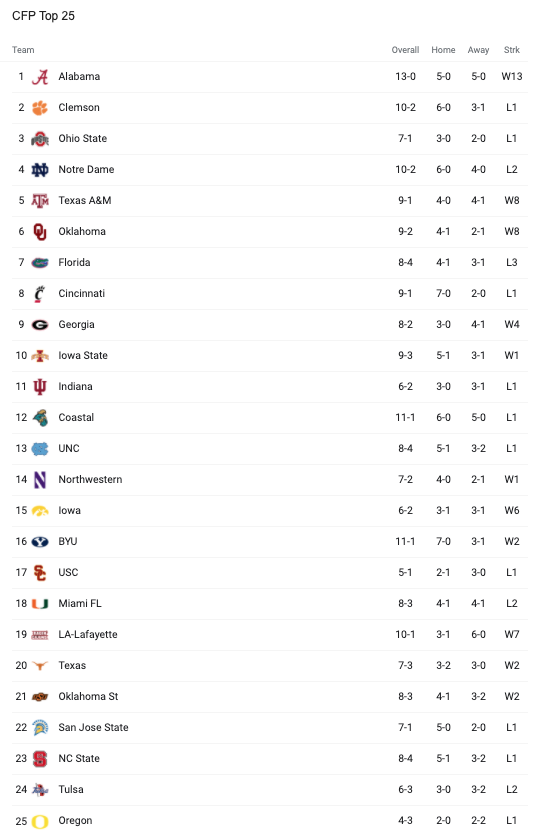

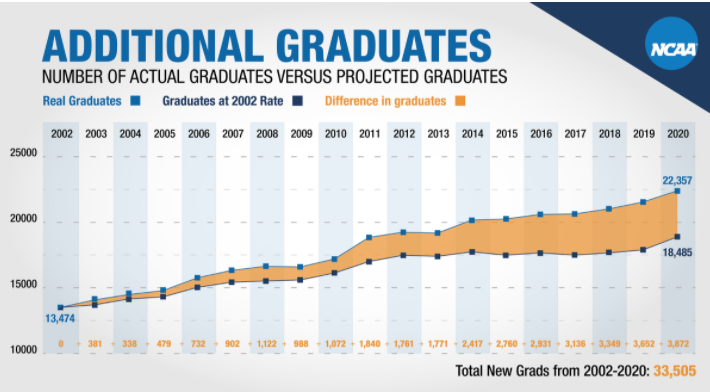

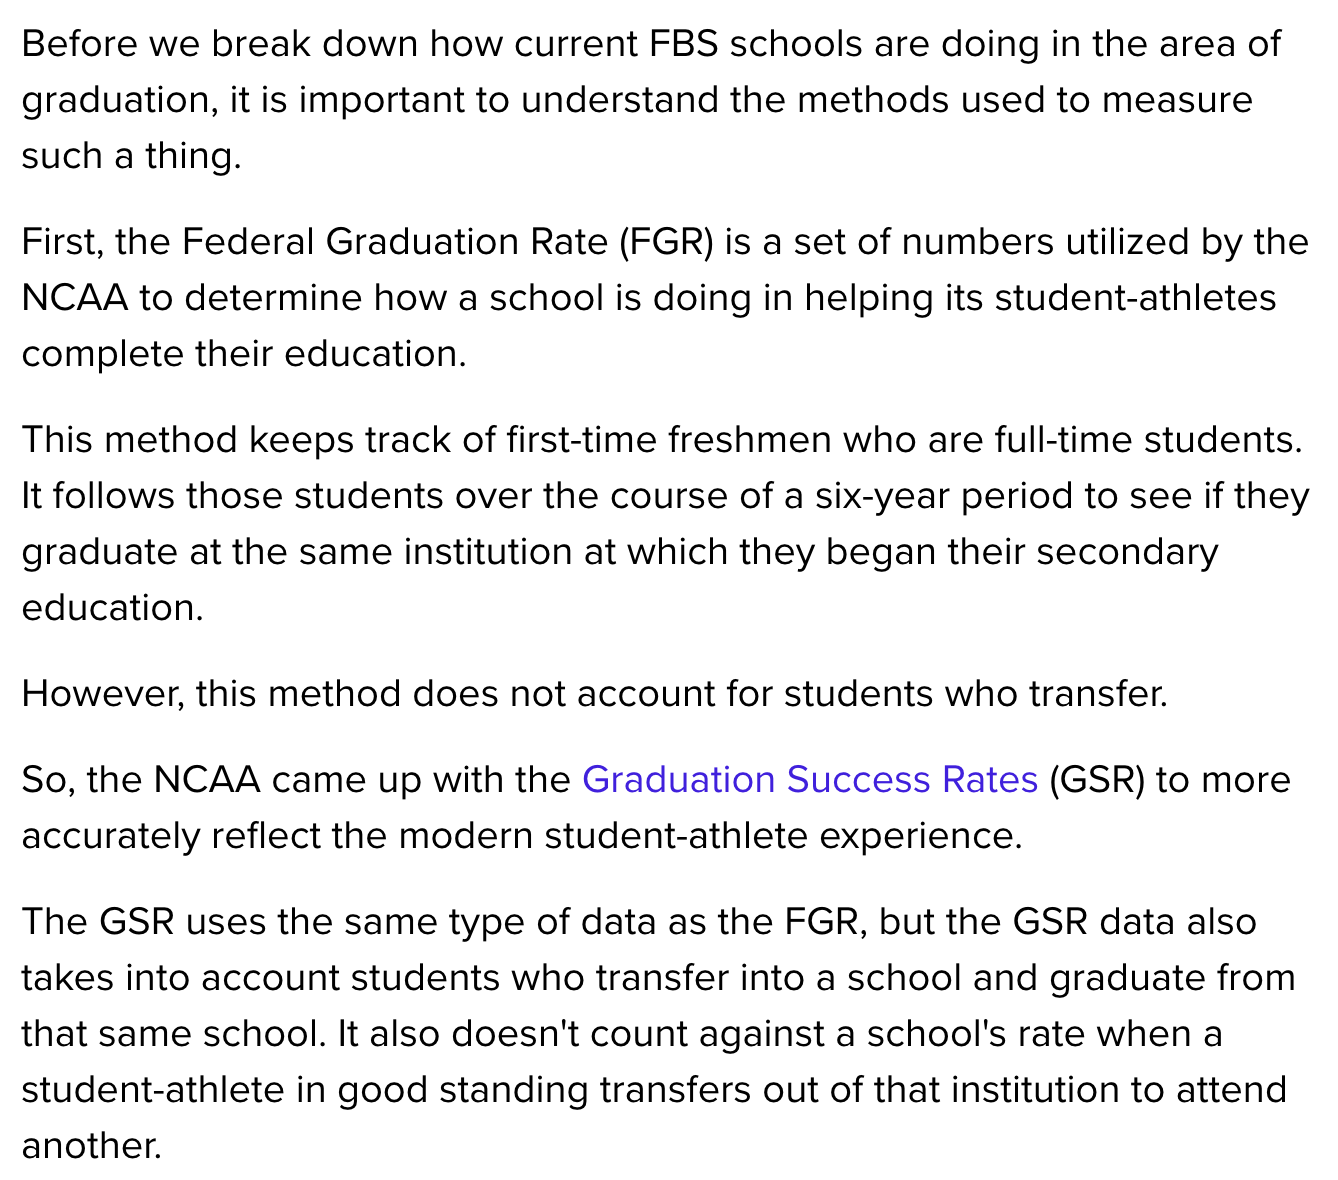

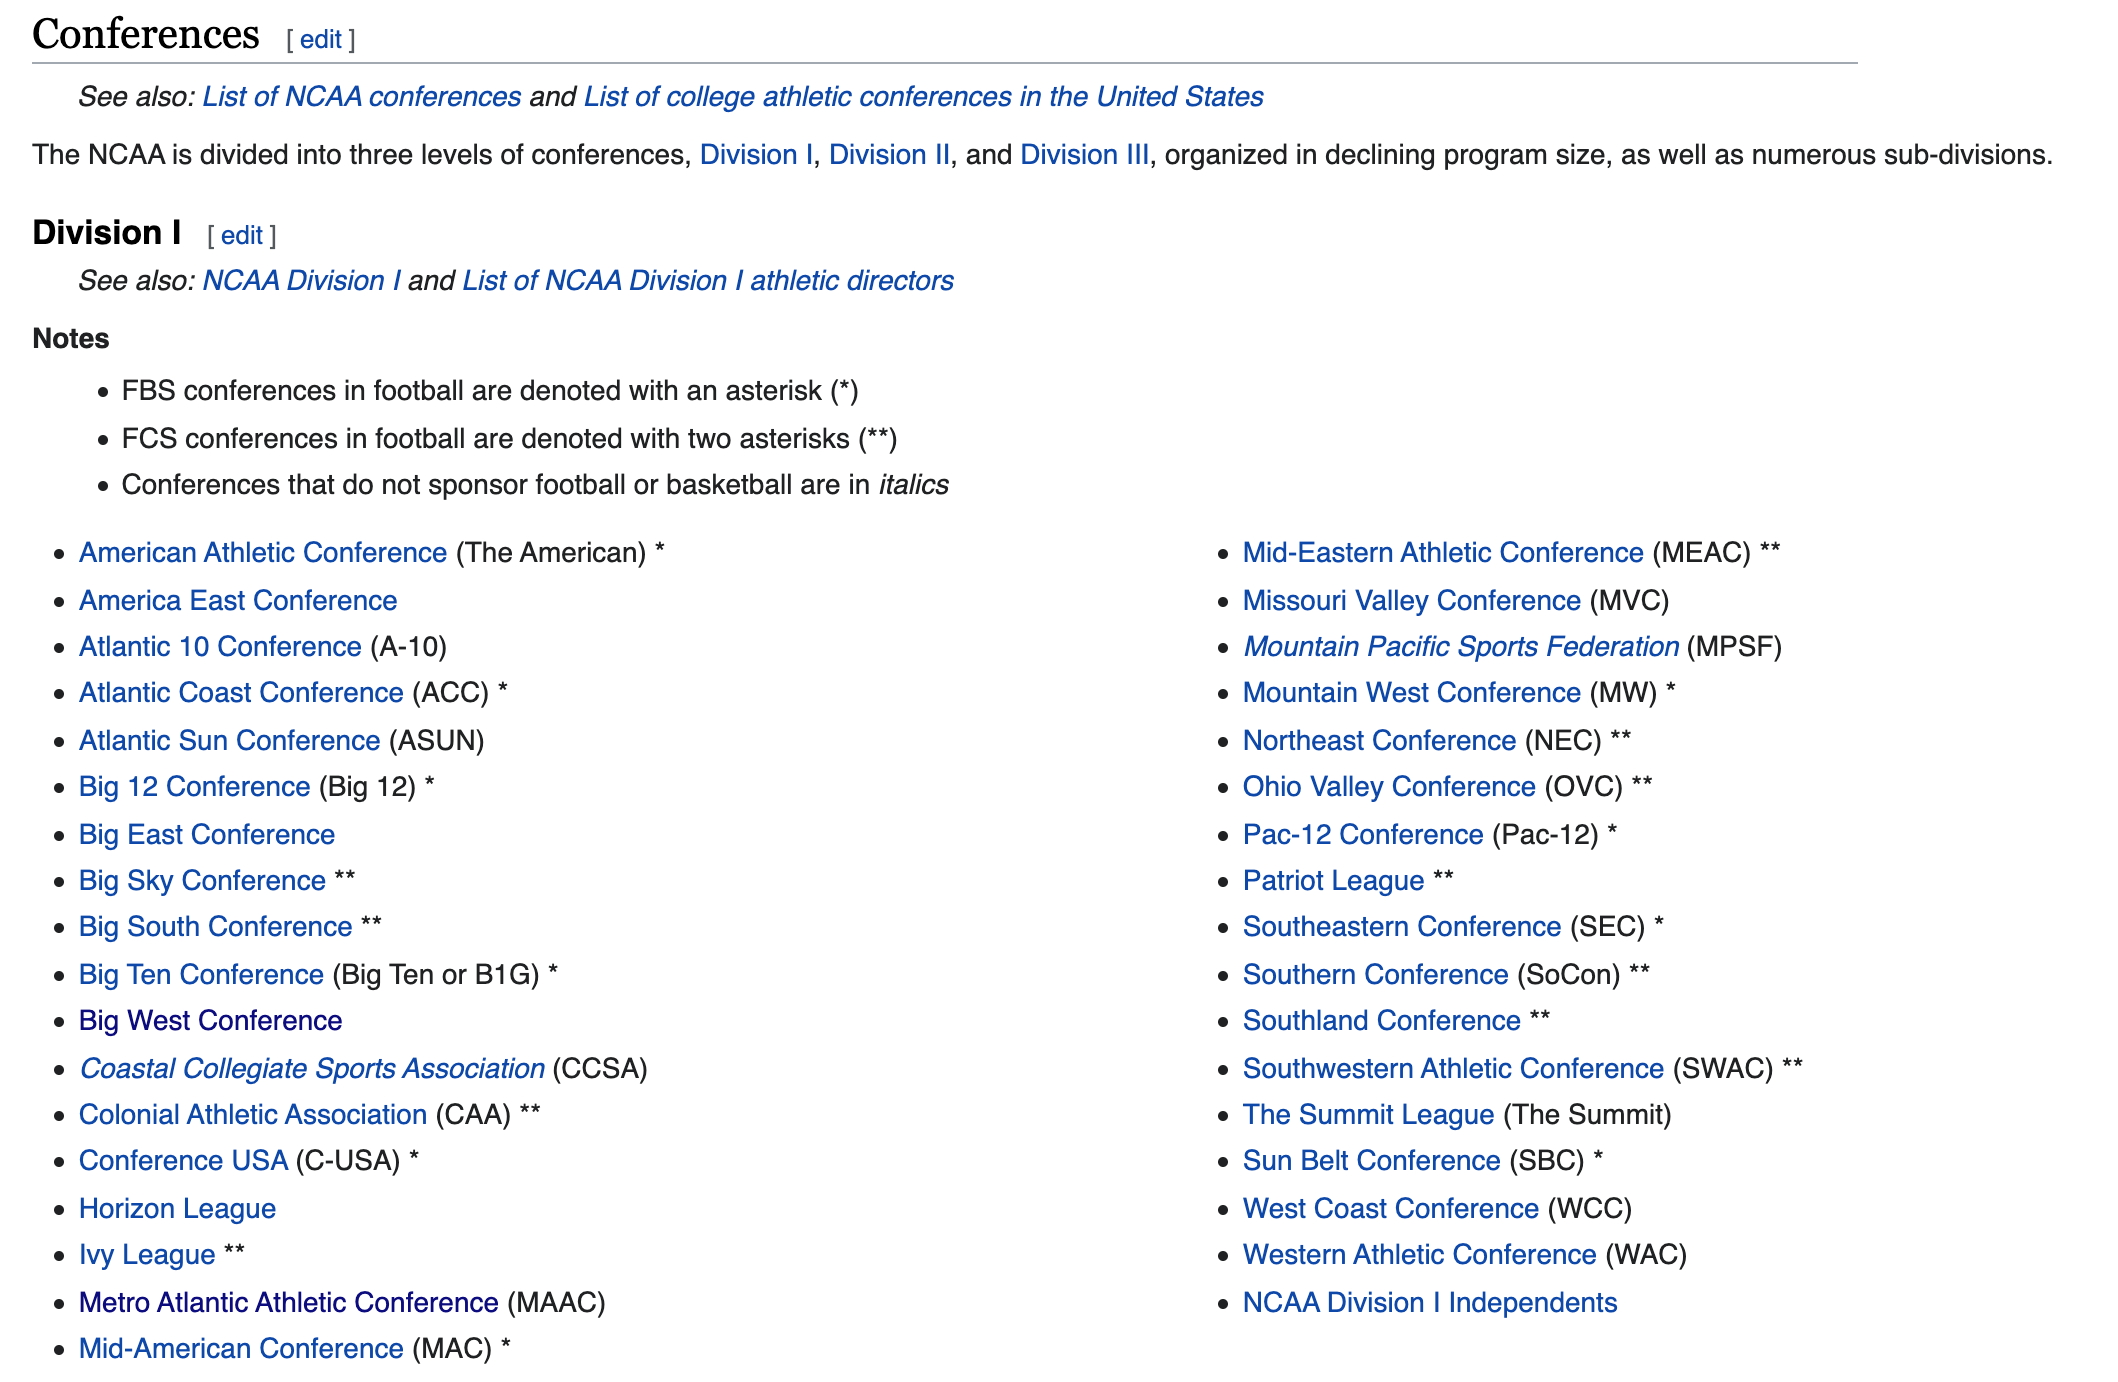



In [19]:
AllSchools = pd.merge(Schools,StatesInfo, on=["StateName"])
print('Total Number of rows Processed: ',len(AllSchools))
AllSchools.head()

Total Number of rows Processed:  346


,SchoolName,School,Team,City,StateName,Type,Enrollment,PrimaryConference,State,Capital
0,Abilene Christian University,Abilene Christian,Wildcats,Abilene,Texas,Private/Churches of Christ,5315,Southland Conference,TX,Austin
1,Baylor University,Baylor,Bears and Lady Bears,Waco,Texas,Private/Baptist,18033,Big 12 Conference,TX,Austin
2,University of Houston,Houston,Cougars,Houston,Texas,State,46148,American Athletic Conference,TX,Austin
3,Houston Baptist University,Houston Baptist,Huskies,Houston,Texas,Private/Baptist,3741,Southland Conference,TX,Austin
4,University of the Incarnate Word,Incarnate Word,Cardinals,San Antonio,Texas,Private/Catholic,10226,Southland Conference,TX,Austin


In [20]:
print(Coaches["Conference"].unique())

['Mt. West' 'MAC' 'SEC' 'C-USA' 'Sun Belt' 'Pac-12' 'Ind.' 'ACC' 'AAC'
 'Big Ten' 'Big 12']


In [21]:
# Cleanup Conference names from GraduationRates, Stadiums and CollegeRecords

#Before
print("Before:\n")
print(sorted(set(Coaches['Conference']), reverse = False),"\n")
print(sorted(set(GraduationRates['PrimaryConference']), reverse = False),"\n")
print(sorted(set(CollegeRecords['Conference']), reverse = False),"\n")
print(sorted(set(Stadiums['Conference']), reverse = False),"\n")
print(sorted(set(AllSchools['PrimaryConference']), reverse = False))

ConfFullName = ['Atlantic Coast Conference', 'American Athletic Conference', 'Big 12 Conference', 'Big Ten Conference','Big 10', 'Conference USA', 'Independent','Independents', 'Mid-American Conference',
             'Mountain West Conference','Mountain West','Mt. West', 'Pac-12 Conference', 'Southeastern Conference', 'Sun Belt Conference','Colonial Athletic Association','Mid-Eastern Athletic Conf.'
            ,'Missouri Valley Football Conference','Northeast Conference', 'Ohio Valley Conference','Southern Conference','Southwestern Athletic Conf.','West Coast Conference','Western Athletic Conference'
            ,'Southwestern Athletic Conference', 'Metro Atlantic Athletic Conference','Atlantic 10 Conference', 'Atlantic Sun Conference', 'The Ivy League', 'Mid-Eastern Athletic Conference', 'Missouri Valley Conference'
            , 'The Summit League']
ConfAbbreName = ['ACC', 'AAC', 'Big 12', 'Big Ten', 'Big Ten', 'C-USA', 'Ind.','Ind.', 'MAC', 'MW','MW','MW', 'Pac-12', 'SEC', 'Sun Belt','CAA','MEAC','MVC','NEC','OVC','SoCon'
                 ,'SWAC','WCC','WAC','SWAC','MAAC','A-10','ASUN', 'Ivy League','MEAC','MVC','Summit League']

Coaches['Conference'] = Coaches['Conference'].replace(ConfFullName, ConfAbbreName, regex=False)
GraduationRates['PrimaryConference'] = GraduationRates['PrimaryConference'].replace(ConfFullName, ConfAbbreName, regex=False)
CollegeRecords['Conference'] = CollegeRecords['Conference'].replace(ConfFullName, ConfAbbreName, regex=False)
Stadiums['Conference'] = Stadiums['Conference'].replace(ConfFullName, ConfAbbreName, regex=False)
AllSchools['PrimaryConference'] = AllSchools['PrimaryConference'].replace(ConfFullName, ConfAbbreName, regex=False)

#After
print("After:\n")
print(sorted(set(Coaches['Conference']), reverse = False),"\n")
print(sorted(set(GraduationRates['PrimaryConference']), reverse = False),"\n")
print(sorted(set(CollegeRecords['Conference']), reverse = False),"\n")
print(sorted(set(Stadiums['Conference']), reverse = False),"\n")
print(sorted(set(AllSchools['PrimaryConference']), reverse = False))

Before:

['AAC', 'ACC', 'Big 12', 'Big Ten', 'C-USA', 'Ind.', 'MAC', 'Mt. West', 'Pac-12', 'SEC', 'Sun Belt'] 

['American Athletic Conference', 'Atlantic Coast Conference', 'Big 12 Conference', 'Big Sky Conference', 'Big South Conference', 'Big Ten Conference', 'Colonial Athletic Association', 'Conference USA', 'Independent', 'Mid-American Conference', 'Mid-Eastern Athletic Conf.', 'Missouri Valley Football Conference', 'Mountain West Conference', 'Northeast Conference', 'Ohio Valley Conference', 'Pac-12 Conference', 'Patriot League', 'Pioneer Football League', 'Southeastern Conference', 'Southern Conference', 'Southland Conference', 'Southwestern Athletic Conf.', 'Sun Belt Conference', 'The Ivy League'] 

['American Athletic Conference', 'Atlantic Coast Conference', 'Big 10', 'Big 12', 'Conference USA', 'Independents', 'Mid-American Conference', 'Mountain West', 'Pac-12', 'Southeastern Conference', 'Sun Belt'] 

['AAC', 'ACC', 'Big 12', 'Big Ten', 'C-USA', 'Ind.', 'MAC', 'Mt. West', 

In [22]:
# Cleanup School/College names from Coaches, GraduationRates, Stadiums CollegeRecords and CollegeRank

In [23]:
SchoolsDF = pd.merge(AllSchools,GraduationRates, on=["SchoolName","State"])
print('Total Number of rows Processed: ',len(SchoolsDF))
SchoolsDF.drop(["PrimaryConference_y"], axis=1,inplace=True)
SchoolsDF.rename(columns={'PrimaryConference_x':'Conference'}, inplace=True)
SchoolsDF.head()

Total Number of rows Processed:  209


,SchoolName,School,Team,City,StateName,Type,Enrollment,Conference,State,Capital,CohortYear,Year,Sport,GSR,FSR
0,Abilene Christian University,Abilene Christian,Wildcats,Abilene,Texas,Private/Churches of Christ,5315,Southland Conference,TX,Austin,2011,2017-2018,Football,61,41.0
1,Baylor University,Baylor,Bears and Lady Bears,Waco,Texas,Private/Baptist,18033,Big 12,TX,Austin,2011,2017-2018,Football,87,66.0
2,University of Houston,Houston,Cougars,Houston,Texas,State,46148,AAC,TX,Austin,2011,2017-2018,Football,65,60.0
3,University of the Incarnate Word,Incarnate Word,Cardinals,San Antonio,Texas,Private/Catholic,10226,Southland Conference,TX,Austin,2011,2017-2018,Football,78,54.0
4,Lamar University,Lamar,Cardinals and Lady Cardinals,Beaumont,Texas,State,15460,Southland Conference,TX,Austin,2011,2017-2018,Football,69,59.0


In [24]:
CollegeRecords['School'] = CollegeRecords['School'].replace('UCF', 'Central Florida', regex=False)
CollegeRecords['School'] = CollegeRecords['School'].replace('Miami (FL)', 'Miami (Fla.)', regex=False)
CollegeRecords['School'] = CollegeRecords['School'].replace(['UTSA', 'UTEP', 'Southern Miss'], ['Texas-San Antonio', 'Texas-El Paso', 'Southern Mississippi'], regex=False)

In [25]:
# Build the fuzzy matcher
CollegeRecords['SchoolFuzz'] = CollegeRecords.School.apply(lambda x: [process.extract(x, Coaches.School, limit=1)][0][0][0])
Coaches['SchoolFuzz'] = Coaches.School.apply(lambda x: [process.extract(x, CollegeRecords.School, limit=1)][0][0][0])

# Select columns from coaches and records that should be linked. 
left_on = ['Conference', 'SchoolFuzz']
right_on = ['Conference', 'SchoolFuzz']

Coaches_CollegeRecordsDF = pd.merge(Coaches,CollegeRecords, how="left",left_on=left_on, right_on=right_on)
print('Total Number of rows Processed: ',len(Coaches_CollegeRecordsDF))

Total Number of rows Processed:  126


In [26]:
Coaches_CollegeRecordsDF.drop(["SchoolFuzz","School_y"], axis=1,inplace=True)
Coaches_CollegeRecordsDF.rename(columns={'School_x':'School'}, inplace=True)

In [27]:
# Build the fuzzy matcher
Coaches_CollegeRecordsDF['SchoolFuzz'] = Coaches_CollegeRecordsDF.School.apply(lambda x: [process.extract(x, SchoolsDF.School, limit=1)][0][0][0])

# Select columns from coaches and records that should be linked. 
left_on = ['Conference', 'SchoolFuzz']
right_on = ['Conference', 'School']

# Merge the two data frames.
Coaches_CollegeRecords_gradDF = pd.merge(Coaches_CollegeRecordsDF, SchoolsDF, how='left', left_on=left_on, right_on=right_on)
Coaches_CollegeRecords_gradDF.head()

,School_x,Conference,Coach,TotalPay,Bonus,HomeWon,HomeLoss,ConfWon,ConfLoss,PlayedFor,PlayedAgainst,SchoolFuzz,SchoolName,School_y,Team,City,StateName,Type,Enrollment,State,Capital,CohortYear,Year,Sport,GSR,FSR
0,Air Force,MW,Troy Calhoun,885000.0,247000.0,3,5,5,7,363,309,Rice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Akron,MAC,Terry Bowden,412500.0,225000.0,2,6,4,8,227,326,Akron,University of Akron,Akron,Zips,Akron,Ohio,State,16407.0,OH,Columbus,2011.0,2017-2018,Football,72.0,61.0
2,Alabama,SEC,Nick Saban,8307000.0,1100000.0,8,0,14,1,684,271,Alabama,University of Alabama,Alabama,Crimson Tide,Tuscaloosa,Alabama,State,33305.0,AL,Montgomery,2011.0,2017-2018,Football,84.0,63.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,950000.0,7,1,11,3,418,238,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,295000.0,7,1,11,2,485,201,Appalachian State,Appalachian State University,Appalachian State,Mountaineers,Boone,North Carolina,State,14311.0,NC,Raleigh,2011.0,2017-2018,Football,71.0,67.0


In [28]:
Coaches_CollegeRecords_gradDF.drop(["SchoolFuzz","School_y"], axis=1,inplace=True)
Coaches_CollegeRecords_gradDF.rename(columns={'School_x':'School'}, inplace=True)

In [29]:
# Build the fuzzy matcher
Coaches_CollegeRecords_gradDF['SchoolFuzz'] = Coaches_CollegeRecords_gradDF.School.apply(lambda x: [process.extract(x, Stadiums.School, limit=1)][0][0][0])

# Select columns from coaches and records that should be linked. 
left_on = ['Conference', 'SchoolFuzz']
right_on = ['Conference', 'School']

# Merge the two data frames.
Coaches_Records_Grad_StadiumDF = pd.merge(Coaches_CollegeRecords_gradDF, Stadiums, how='left', left_on=left_on, right_on=right_on)
Coaches_Records_Grad_StadiumDF.head()

,School_x,Conference,Coach,TotalPay,Bonus,HomeWon,HomeLoss,ConfWon,ConfLoss,PlayedFor,PlayedAgainst,SchoolName,Team,City,StateName,Type,Enrollment,State,Capital,CohortYear,Year,Sport,GSR,FSR,SchoolFuzz,Stadium,School_y,Capacity,Opened
0,Air Force,MW,Troy Calhoun,885000.0,247000.0,3,5,5,7,363,309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Air Force,Falcon Stadium,Air Force,52237.0,1962.0
1,Akron,MAC,Terry Bowden,412500.0,225000.0,2,6,4,8,227,326,University of Akron,Zips,Akron,Ohio,State,16407.0,OH,Columbus,2011.0,2017-2018,Football,72.0,61.0,Akron,InfoCision Stadium,Akron,30000.0,2009.0
2,Alabama,SEC,Nick Saban,8307000.0,1100000.0,8,0,14,1,684,271,University of Alabama,Crimson Tide,Tuscaloosa,Alabama,State,33305.0,AL,Montgomery,2011.0,2017-2018,Football,84.0,63.0,University of Alabama,Bryant Denny Stadium,University of Alabama,101821.0,1929.0
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,950000.0,7,1,11,3,418,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University of Texas at San Antonio,Alamodome,University of Texas at San Antonio,65000.0,1993.0
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,295000.0,7,1,11,2,485,201,Appalachian State University,Mountaineers,Boone,North Carolina,State,14311.0,NC,Raleigh,2011.0,2017-2018,Football,71.0,67.0,Appalachain State,Kidd Brewer Stadium,Appalachain State,24150.0,1962.0


In [30]:
Coaches_Records_Grad_StadiumDF.drop(["SchoolFuzz","School_y"], axis=1,inplace=True)
Coaches_Records_Grad_StadiumDF.rename(columns={'School_x':'School'}, inplace=True)

In [31]:
# Build the fuzzy matcher
Coaches_Records_Grad_StadiumDF['SchoolFuzz'] = Coaches_Records_Grad_StadiumDF.School.apply(lambda x: [process.extract(x, CollegeRank.School, limit=1)][0][0][0])

# Select columns from coaches and records that should be linked. 
left_on = ['School', 'SchoolFuzz']
right_on = ['School', 'School']

# Merge the two data frames.
Coaches_Records_Grad_Stadium_RankDF = pd.merge(Coaches_Records_Grad_StadiumDF, CollegeRank, how='left', left_on=left_on, right_on=right_on)
Coaches_Records_Grad_Stadium_RankDF.head()

,School,Conference,Coach,TotalPay,Bonus,HomeWon,HomeLoss,ConfWon,ConfLoss,PlayedFor,PlayedAgainst,SchoolName,Team,City,StateName,Type,Enrollment,State,Capital,CohortYear,Year,Sport,GSR,FSR,Stadium,Capacity,Opened,SchoolFuzz,Rank,PreviousRank
0,Air Force,MW,Troy Calhoun,885000.0,247000.0,3,5,5,7,363,309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Falcon Stadium,52237.0,1962.0,Central Florida,NaN,NaN
1,Akron,MAC,Terry Bowden,412500.0,225000.0,2,6,4,8,227,326,University of Akron,Zips,Akron,Ohio,State,16407.0,OH,Columbus,2011.0,2017-2018,Football,72.0,61.0,InfoCision Stadium,30000.0,2009.0,Michigan,NaN,NaN
2,Alabama,SEC,Nick Saban,8307000.0,1100000.0,8,0,14,1,684,271,University of Alabama,Crimson Tide,Tuscaloosa,Alabama,State,33305.0,AL,Montgomery,2011.0,2017-2018,Football,84.0,63.0,Bryant Denny Stadium,101821.0,1929.0,University of Alabama,NaN,NaN
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,950000.0,7,1,11,3,418,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alamodome,65000.0,1993.0,Texas A&M,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,295000.0,7,1,11,2,485,201,Appalachian State University,Mountaineers,Boone,North Carolina,State,14311.0,NC,Raleigh,2011.0,2017-2018,Football,71.0,67.0,Kidd Brewer Stadium,24150.0,1962.0,Ohio State,NaN,NaN


In [32]:
Coaches_Records_Grad_Stadium_RankDF.drop(["SchoolFuzz"], axis=1,inplace=True)
Coaches_Records_Grad_Stadium_RankDF.rename(columns={'School_x':'School'}, inplace=True)

In [33]:
finalDF = Coaches_Records_Grad_Stadium_RankDF.copy()
finalDF = finalDF.rename(str.lower, axis=1)
finalDF.head()

,school,conference,coach,totalpay,bonus,homewon,homeloss,confwon,confloss,playedfor,playedagainst,schoolname,team,city,statename,type,enrollment,state,capital,cohortyear,year,sport,gsr,fsr,stadium,capacity,opened,rank,previousrank
0,Air Force,MW,Troy Calhoun,885000.0,247000.0,3,5,5,7,363,309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Falcon Stadium,52237.0,1962.0,NaN,NaN
1,Akron,MAC,Terry Bowden,412500.0,225000.0,2,6,4,8,227,326,University of Akron,Zips,Akron,Ohio,State,16407.0,OH,Columbus,2011.0,2017-2018,Football,72.0,61.0,InfoCision Stadium,30000.0,2009.0,NaN,NaN
2,Alabama,SEC,Nick Saban,8307000.0,1100000.0,8,0,14,1,684,271,University of Alabama,Crimson Tide,Tuscaloosa,Alabama,State,33305.0,AL,Montgomery,2011.0,2017-2018,Football,84.0,63.0,Bryant Denny Stadium,101821.0,1929.0,NaN,NaN
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,950000.0,7,1,11,3,418,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alamodome,65000.0,1993.0,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,295000.0,7,1,11,2,485,201,Appalachian State University,Mountaineers,Boone,North Carolina,State,14311.0,NC,Raleigh,2011.0,2017-2018,Football,71.0,67.0,Kidd Brewer Stadium,24150.0,1962.0,NaN,NaN


In [34]:
finalDF.drop(['schoolname','team','capital','sport','opened','cohortyear','year','stadium'], axis=1,inplace=True)

In [35]:
# finalDF.drop(['schoolname','team','capital','sport','opened','cohortyear','year','stadium'], axis=1,inplace=True)
finalDF.rename(columns={ 'totalpay':'pay'
                        ,'homewon':'hWon'
                        ,'homeloss':'hLoss'
                        ,'confwon':'confWon'
                        ,'confloss':'confLoss'
                        ,'playedfor':'pFor'
                        ,'playedagainst':'pAgainst'
                       }, inplace=True)
finalDF.head()

,school,conference,coach,pay,bonus,hWon,hLoss,confWon,confLoss,pFor,pAgainst,city,statename,type,enrollment,state,gsr,fsr,capacity,rank,previousrank
0,Air Force,MW,Troy Calhoun,885000.0,247000.0,3,5,5,7,363,309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52237.0,NaN,NaN
1,Akron,MAC,Terry Bowden,412500.0,225000.0,2,6,4,8,227,326,Akron,Ohio,State,16407.0,OH,72.0,61.0,30000.0,NaN,NaN
2,Alabama,SEC,Nick Saban,8307000.0,1100000.0,8,0,14,1,684,271,Tuscaloosa,Alabama,State,33305.0,AL,84.0,63.0,101821.0,NaN,NaN
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,950000.0,7,1,11,3,418,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000.0,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,295000.0,7,1,11,2,485,201,Boone,North Carolina,State,14311.0,NC,71.0,67.0,24150.0,NaN,NaN


In [36]:
finalDF.head()

,school,conference,coach,pay,bonus,hWon,hLoss,confWon,confLoss,pFor,pAgainst,city,statename,type,enrollment,state,gsr,fsr,capacity,rank,previousrank
0,Air Force,MW,Troy Calhoun,885000.0,247000.0,3,5,5,7,363,309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52237.0,NaN,NaN
1,Akron,MAC,Terry Bowden,412500.0,225000.0,2,6,4,8,227,326,Akron,Ohio,State,16407.0,OH,72.0,61.0,30000.0,NaN,NaN
2,Alabama,SEC,Nick Saban,8307000.0,1100000.0,8,0,14,1,684,271,Tuscaloosa,Alabama,State,33305.0,AL,84.0,63.0,101821.0,NaN,NaN
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,950000.0,7,1,11,3,418,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000.0,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,295000.0,7,1,11,2,485,201,Boone,North Carolina,State,14311.0,NC,71.0,67.0,24150.0,NaN,NaN


In [37]:
df_coaches = pd.merge(finalDF,Schools, how="left",right_on=["School"],left_on=["school"])
print('Total Number of rows Processed: ',len(df_coaches))
df_coaches.head()

Total Number of rows Processed:  127


,school,conference,coach,pay,bonus,hWon,hLoss,confWon,confLoss,pFor,pAgainst,city,statename,type,enrollment,state,gsr,fsr,capacity,rank,previousrank,SchoolName,School,Team,City,StateName,Type,Enrollment,PrimaryConference
0,Air Force,MW,Troy Calhoun,885000.0,247000.0,3,5,5,7,363,309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52237.0,NaN,NaN,United States Air Force Academy,Air Force,Falcons,Colorado Springs,Colorado,Federal academy,4237.0,Mountain West Conference
1,Akron,MAC,Terry Bowden,412500.0,225000.0,2,6,4,8,227,326,Akron,Ohio,State,16407.0,OH,72.0,61.0,30000.0,NaN,NaN,University of Akron,Akron,Zips,Akron,Ohio,State,16407.0,Mid-American Conference
2,Alabama,SEC,Nick Saban,8307000.0,1100000.0,8,0,14,1,684,271,Tuscaloosa,Alabama,State,33305.0,AL,84.0,63.0,101821.0,NaN,NaN,University of Alabama,Alabama,Crimson Tide,Tuscaloosa,Alabama,State,33305.0,Southeastern Conference
3,Alabama at Birmingham,C-USA,Bill Clark,900000.0,950000.0,7,1,11,3,418,238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Appalachian State,Sun Belt,Scott Satterfield,712500.0,295000.0,7,1,11,2,485,201,Boone,North Carolina,State,14311.0,NC,71.0,67.0,24150.0,NaN,NaN,Appalachian State University,Appalachian State,Mountaineers,Boone,North Carolina,State,14311.0,Sun Belt Conference


In [38]:
col_names = ['coach','school','SchoolName','Team','Type','StateName','state','City','conference','PrimaryConference'
             ,'capacity','hWon','hLoss','confWon','confLoss','pFor','pAgainst'
             ,'gsr','fsr','Enrollment','rank','previousrank','pay','bonus']

coachesDF = df_coaches.reindex(columns=col_names)
coachesDF = coachesDF.fillna(0)


coachesDF["capacity"] = coachesDF["capacity"].astype('int')
coachesDF["Enrollment"] = coachesDF["Enrollment"].astype('int')
coachesDF["rank"] = coachesDF["rank"].astype('int')
coachesDF["previousrank"] = coachesDF["previousrank"].astype('int')

print('Total Number of rows Processed: ',len(coachesDF))
coachesDF.head()

Total Number of rows Processed:  127


,coach,school,SchoolName,Team,Type,StateName,state,City,conference,PrimaryConference,capacity,hWon,hLoss,confWon,confLoss,pFor,pAgainst,gsr,fsr,Enrollment,rank,previousrank,pay,bonus
0,Troy Calhoun,Air Force,United States Air Force Academy,Falcons,Federal academy,Colorado,0,Colorado Springs,MW,Mountain West Conference,52237,3,5,5,7,363,309,0.0,0.0,4237,0,0,885000.0,247000.0
1,Terry Bowden,Akron,University of Akron,Zips,State,Ohio,OH,Akron,MAC,Mid-American Conference,30000,2,6,4,8,227,326,72.0,61.0,16407,0,0,412500.0,225000.0
2,Nick Saban,Alabama,University of Alabama,Crimson Tide,State,Alabama,AL,Tuscaloosa,SEC,Southeastern Conference,101821,8,0,14,1,684,271,84.0,63.0,33305,0,0,8307000.0,1100000.0
3,Bill Clark,Alabama at Birmingham,0,0,0,0,0,0,C-USA,0,65000,7,1,11,3,418,238,0.0,0.0,0,0,0,900000.0,950000.0
4,Scott Satterfield,Appalachian State,Appalachian State University,Mountaineers,State,North Carolina,NC,Boone,Sun Belt,Sun Belt Conference,24150,7,1,11,2,485,201,71.0,67.0,14311,0,0,712500.0,295000.0


In [39]:
# coachesDF[coachesDF['coach']=='']

In [40]:
# coachesDF[coachesDF['state']=='NY']

In [41]:
#display any columns with value as 0
# coachesDF.loc[(coachesDF['Type']!=0)]

In [42]:
#display any columns with value as 0
# coachesDF.loc[(coachesDF['school']==0)]
# coachesDF.loc[(coachesDF['StateName']==0)]
# coachesDF.loc[(coachesDF['conference']==0)]
# coachesDF.loc[(coachesDF['SchoolName']==0)]

# coachesDF.loc[(coachesDF['state']==0)]
# coachesDF.loc[(coachesDF['StateName']==0)]

In [43]:
#manually update missing values

In [44]:
#Bill Clark
coachesDF.loc[coachesDF.coach == "Bill Clark", "StateName"] = "Alabama"
coachesDF.loc[coachesDF.coach == "Bill Clark", "state"] = "AL"
coachesDF.loc[coachesDF.coach == "Bill Clark", "City"] = "Birmingham"

#Josh Heupel
coachesDF.loc[coachesDF.coach == "Josh Heupel", "StateName"] = "Florida"
coachesDF.loc[coachesDF.coach == "Josh Heupel", "state"] = "FL"
coachesDF.loc[coachesDF.coach == "Josh Heupel", "City"] = "Orlando"
coachesDF.loc[coachesDF.coach == "Josh Heupel", "school"] = "Central Florida"
coachesDF.loc[coachesDF.coach == "Josh Heupel", "SchoolName"] = "University of Central Florida"

#Randy Edsall
coachesDF.loc[coachesDF.coach == "Randy Edsall", "StateName"] = "Connecticut"
coachesDF.loc[coachesDF.coach == "Randy Edsall", "state"] = "CT"
coachesDF.loc[coachesDF.coach == "Randy Edsall", "City"] = "Storrs"

#Butch Davis
coachesDF.loc[coachesDF.coach == "Butch Davis", "StateName"] = "Florida"
coachesDF.loc[coachesDF.coach == "Butch Davis", "state"] = "FL"
coachesDF.loc[coachesDF.coach == "Butch Davis", "City"] = "University Park"

#Billy Napier
coachesDF.loc[coachesDF.coach == "Billy Napier", "StateName"] = "Louisiana"
coachesDF.loc[coachesDF.coach == "Billy Napier", "state"] = "LA"
coachesDF.loc[coachesDF.coach == "Billy Napier", "City"] = "Lafayette"

#Matt Viator
coachesDF.loc[coachesDF.coach == "Matt Viator", "StateName"] = "Louisiana"
coachesDF.loc[coachesDF.coach == "Matt Viator", "state"] = "LA"
coachesDF.loc[coachesDF.coach == "Matt Viator", "City"] = "Monroe"

#Mark Whipple
coachesDF.loc[coachesDF.coach == "Mark Whipple", "StateName"] = "Massachusetts"
coachesDF.loc[coachesDF.coach == "Randy Edsall", "state"] = "MA"
coachesDF.loc[coachesDF.coach == "Randy Edsall", "City"] = "Amherst"

#Mark Richt
coachesDF.loc[coachesDF.coach == "Mark Richt", "StateName"] = "Florida"
coachesDF.loc[coachesDF.coach == "Mark Richt", "state"] = "FL"
coachesDF.loc[coachesDF.coach == "Mark Richt", "City"] = "Miami"

#Chuck Martin
coachesDF.loc[coachesDF.coach == "Chuck Martin", "StateName"] = "Ohio"
coachesDF.loc[coachesDF.coach == "Chuck Martin", "state"] = "OH"
coachesDF.loc[coachesDF.coach == "Chuck Martin", "City"] = "Oxford"

#Matt Luke
coachesDF.loc[coachesDF.coach == "Matt Luke", "StateName"] = "Mississippi,"
coachesDF.loc[coachesDF.coach == "Matt Luke", "state"] = "MS"
coachesDF.loc[coachesDF.coach == "Matt Luke", "City"] = "University"

#Tony Sanchez
coachesDF.loc[coachesDF.coach == "Tony Sanchez", "StateName"] = "Nevada"
coachesDF.loc[coachesDF.coach == "Tony Sanchez", "state"] = "NV"
coachesDF.loc[coachesDF.coach == "Tony Sanchez", "City"] = "Las Vegas"

#Dave Doeren
coachesDF.loc[coachesDF.coach == "Dave Doeren", "StateName"] = "North Carolina"
coachesDF.loc[coachesDF.coach == "Dave Doeren", "state"] = "NC"
coachesDF.loc[coachesDF.coach == "Dave Doeren", "City"] = "Raleigh"

#Clay Helton
coachesDF.loc[coachesDF.coach == "Clay Helton", "StateName"] = "California"
coachesDF.loc[coachesDF.coach == "Clay Helton", "state"] = "CA"
coachesDF.loc[coachesDF.coach == "Clay Helton", "City"] = "Los Angeles"

#Jay Hopson
coachesDF.loc[coachesDF.coach == "Jay Hopson", "StateName"] = "Mississippi"
coachesDF.loc[coachesDF.coach == "Jay Hopson", "state"] = "MS"
coachesDF.loc[coachesDF.coach == "Jay Hopson", "City"] = "Hattiesburg"

#Gary Patterson
coachesDF.loc[coachesDF.coach == "Gary Patterson", "StateName"] = "Texas"
coachesDF.loc[coachesDF.coach == "Gary Patterson", "state"] = "TX"
coachesDF.loc[coachesDF.coach == "Gary Patterson", "City"] = "Fort Worth"

#Dana Dimel
coachesDF.loc[coachesDF.coach == "Dana Dimel", "StateName"] = "Texas"
coachesDF.loc[coachesDF.coach == "Dana Dimel", "state"] = "TX"
coachesDF.loc[coachesDF.coach == "Dana Dimel", "City"] = "El Paso"

#Frank Wilson
coachesDF.loc[coachesDF.coach == "Frank Wilson", "StateName"] = "Texas"
coachesDF.loc[coachesDF.coach == "Frank Wilson", "state"] = "TX"
coachesDF.loc[coachesDF.coach == "Frank Wilson", "City"] = "San Antonio"


In [45]:
# Schools[Schools["School"].str.contains('central',case=False)]
# SchoolsDF[SchoolsDF["School"].str.contains('central',case=False)]
# coachesDF[coachesDF["school"].str.contains('central',case=False)]
# Coaches[Coaches["School"].str.contains('central',case=False)]
# Coaches[Coaches["School"].str.contains('connecticut',case=False)]

In [46]:
# coachesDF.loc[(coachesDF['State']==0)]

In [47]:
# StatesInfo.head()

In [48]:
coachesDF = pd.merge(coachesDF,StatesInfo, on=["StateName"])
print('Total Number of rows Processed: ',len(coachesDF))
coachesDF.head()

Total Number of rows Processed:  126


,coach,school,SchoolName,Team,Type,StateName,state,City,conference,PrimaryConference,capacity,hWon,hLoss,confWon,confLoss,pFor,pAgainst,gsr,fsr,Enrollment,rank,previousrank,pay,bonus,State,Capital
0,Troy Calhoun,Air Force,United States Air Force Academy,Falcons,Federal academy,Colorado,0,Colorado Springs,MW,Mountain West Conference,52237,3,5,5,7,363,309,0.0,0.0,4237,0,0,885000.0,247000.0,CO,Denver
1,Mike MacIntyre,Colorado,University of Colorado Boulder,Buffaloes,State,Colorado,0,Boulder,Pac-12,Pac-12 Conference,0,2,7,5,7,325,327,0.0,0.0,35528,0,0,2878500.0,2150000.0,CO,Denver
2,Mike Bobo,Colorado State,Colorado State University,Rams,State,Colorado,CO,Fort Collins,MW,Mountain West Conference,34400,2,6,3,9,274,441,73.0,61.0,28691,0,0,1800000.0,905000.0,CO,Denver
3,Terry Bowden,Akron,University of Akron,Zips,State,Ohio,OH,Akron,MAC,Mid-American Conference,30000,2,6,4,8,227,326,72.0,61.0,16407,0,0,412500.0,225000.0,OH,Columbus
4,Mike Jinks,Bowling Green,Bowling Green State University,Falcons,State,Ohio,OH,Bowling Green,MAC,Mid-American Conference,23724,2,6,3,9,292,480,82.0,68.0,20395,0,0,437228.0,245000.0,OH,Columbus


In [49]:
#drop unwanted columns
coachesDF.drop(['SchoolName','Team','PrimaryConference','state','Capital'], axis=1,inplace=True)
coachesDF.rename(columns={ 'Type':'type'
                        ,'Enrollment':'enrollment'
                        ,'City':'city'
                        ,'StateName':'stateName'
                        ,'State':'state'
                        }, inplace=True)
coachesDF.head()

,coach,school,type,stateName,city,conference,capacity,hWon,hLoss,confWon,confLoss,pFor,pAgainst,gsr,fsr,enrollment,rank,previousrank,pay,bonus,state
0,Troy Calhoun,Air Force,Federal academy,Colorado,Colorado Springs,MW,52237,3,5,5,7,363,309,0.0,0.0,4237,0,0,885000.0,247000.0,CO
1,Mike MacIntyre,Colorado,State,Colorado,Boulder,Pac-12,0,2,7,5,7,325,327,0.0,0.0,35528,0,0,2878500.0,2150000.0,CO
2,Mike Bobo,Colorado State,State,Colorado,Fort Collins,MW,34400,2,6,3,9,274,441,73.0,61.0,28691,0,0,1800000.0,905000.0,CO
3,Terry Bowden,Akron,State,Ohio,Akron,MAC,30000,2,6,4,8,227,326,72.0,61.0,16407,0,0,412500.0,225000.0,OH
4,Mike Jinks,Bowling Green,State,Ohio,Bowling Green,MAC,23724,2,6,3,9,292,480,82.0,68.0,20395,0,0,437228.0,245000.0,OH


In [50]:
# coachesDF.info()

In [51]:
# Lets create the following variables for further analysis

coachesDF['awayWon'] = coachesDF['confWon'] - coachesDF['hWon'] # Wins as visitor
coachesDF['awayLoss'] = coachesDF['confLoss'] - coachesDF['hLoss'] # Losses as visitor
coachesDF['home'] = coachesDF['hWon']/(coachesDF['hWon']+coachesDF['hLoss']) # Winning record at home
coachesDF['away'] = coachesDF['awayWon']/(coachesDF['awayWon']+coachesDF['awayLoss']) # Winning record as visitor

coachesDF['confRecord'] = coachesDF['confWon']/(coachesDF['confWon']+coachesDF['confLoss']) # Overall winning record
coachesDF['RankDiff'] = coachesDF['rank'] - coachesDF['previousrank'] # Change in rank 

coachesDF['AvgPoints'] = coachesDF.groupby('conference')['pFor'].transform('mean') # Average Points Scored by Conference
coachesDF['AvgAgainst'] = coachesDF.groupby('conference')['pAgainst'].transform('mean') # Average Points Allowed by Conference

coachesDF['OffRating'] = (coachesDF['pFor'] - coachesDF['AvgAgainst'])/coachesDF['AvgPoints'] # Offensive rating for each team
coachesDF['DefRating'] = (coachesDF['pAgainst'] - coachesDF['AvgPoints'])/coachesDF['AvgAgainst'] # Defensive rating for each team

coachesDF['PPG'] = coachesDF['pFor']/(coachesDF['confWon']+coachesDF['confLoss']) # Points Scored per Game
coachesDF['PAG'] = coachesDF['pAgainst']/(coachesDF['confWon']+coachesDF['confLoss']) # Points Allowed per Game


In [52]:
# coachesDF.head()

## Exploratory Analysis

* Lets perform descriptive analysis on the data collected so far. We pretty much expanded the dataset to include wide range of continuous and categorical variables.

In [53]:
# summary statistics
summary = coachesDF.describe()
summary.head()

,capacity,hWon,hLoss,confWon,confLoss,pFor,pAgainst,gsr,fsr,enrollment,rank,previousrank,pay,bonus,awayWon,awayLoss,home,away,confRecord,RankDiff,AvgPoints,AvgAgainst,OffRating,DefRating,PPG,PAG
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,1.260000e+02,126.000000,126.000000,126.000000,120.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,42307.015873,4.007937,3.888889,6.865079,5.904762,379.134921,346.817460,57.023810,46.007937,25331.126984,1.873016,1.865079,2.393518e+06,730056.055556,2.857143,2.015873,0.507407,0.577896,0.528202,0.007937,379.134921,346.817460,0.080833,-0.100103,29.484687,27.376435
std,25411.486662,2.285593,2.270585,3.096716,2.537490,103.011638,81.882101,34.951501,28.945603,15970.714332,5.350116,5.269312,1.883728e+06,662787.838214,1.787576,1.480455,0.258605,0.254501,0.219349,0.389790,27.404594,27.174352,0.275711,0.253998,6.936116,7.142887
min,0.000000,0.000000,0.000000,1.000000,0.000000,162.000000,171.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,-2.000000,332.615385,294.923077,-0.515539,-0.840897,13.500000,13.133333
25%,26724.750000,2.000000,2.000000,5.000000,4.000000,292.750000,287.250000,0.000000,0.000000,14373.000000,0.000000,0.000000,8.068875e+05,221250.000000,2.000000,1.000000,0.312500,0.400000,0.416667,0.000000,360.833333,329.769231,-0.133384,-0.277336,24.395833,22.096154


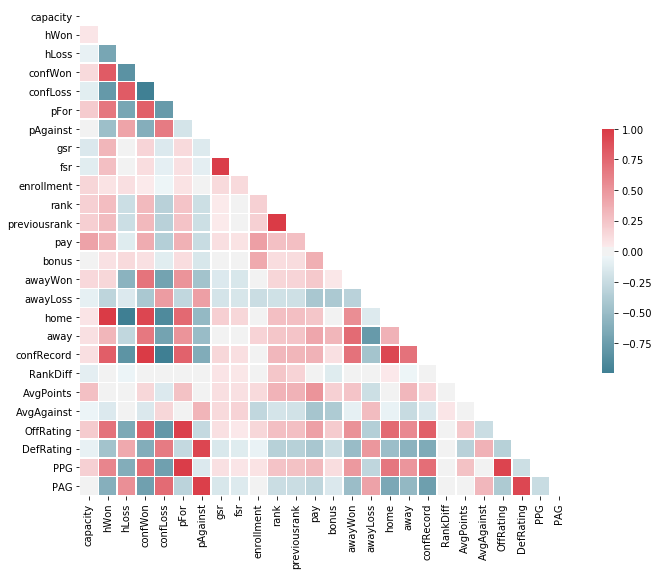

In [54]:
# Enlarge the plot
plt.figure(figsize=(12,9))

# Calculate correlations
corr = coachesDF.corr()
 
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

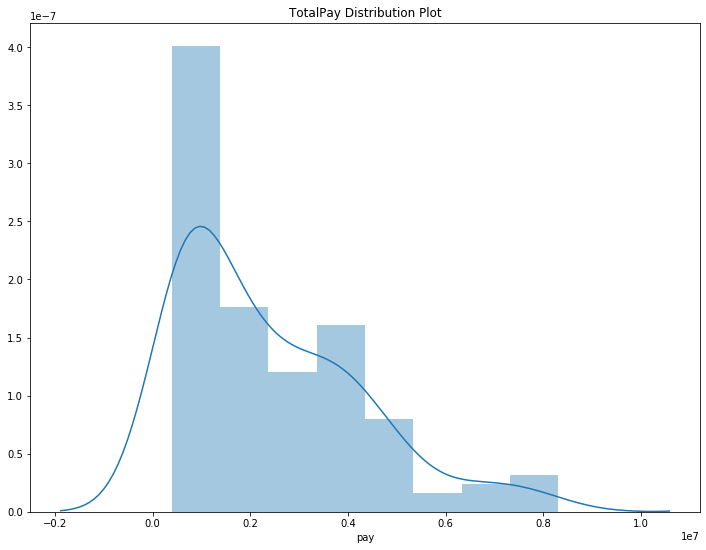

In [55]:
# Enlarge the plot
plt.figure(figsize=(12,9))
plt.title('TotalPay Distribution Plot')
# Distribution Plot (a.k.a. Histogram)
sns.distplot(coachesDF.pay)

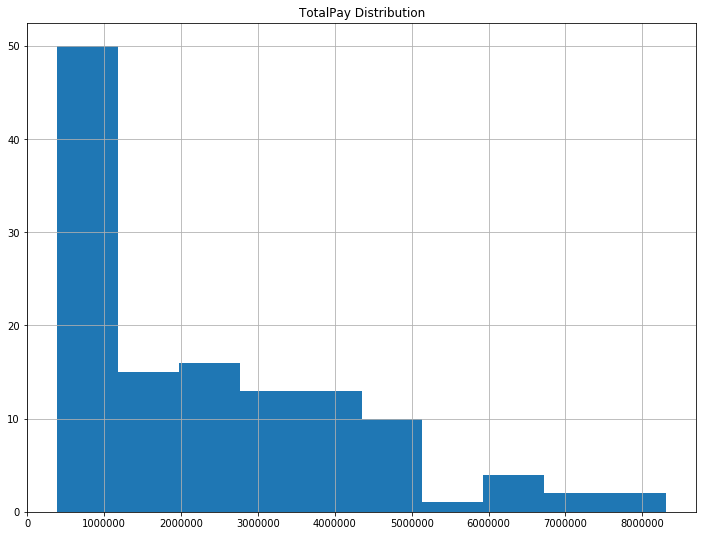

In [56]:
# Enlarge the plot
plt.figure(figsize=(12,9))
plt.title('TotalPay Distribution')
coachesDF["pay"].hist()

In [57]:
ordered_conf_names = (sorted(set(coachesDF['conference']), reverse = False))

In [58]:
print(ordered_conf_names)

['AAC', 'ACC', 'Big 12', 'Big Ten', 'C-USA', 'Ind.', 'MAC', 'MW', 'Pac-12', 'SEC', 'Sun Belt']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

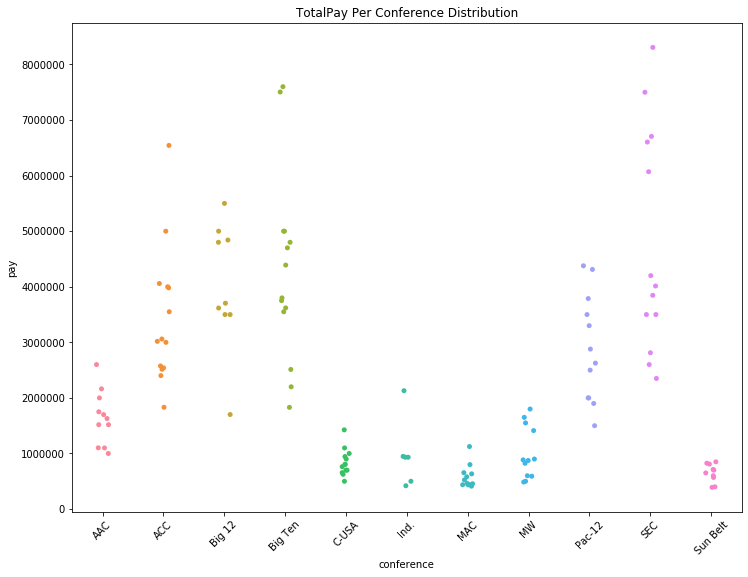

In [59]:
# Enlarge the plot

plt.figure(figsize=(12,9))

sns.stripplot(x = "conference", y = "pay", data = coachesDF, order = ordered_conf_names)
plt.title('TotalPay Per Conference Distribution')
# Rotate x-labels
plt.xticks(rotation=45)



In [60]:
# Enlarge the plot

# plt.figure(figsize=(12,9))

# sns.swarmplot(x = "pay", y = "Conference", data = Coaches, order = ordered_conf_names)

# # Rotate x-labels
# plt.xticks(rotation=30)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

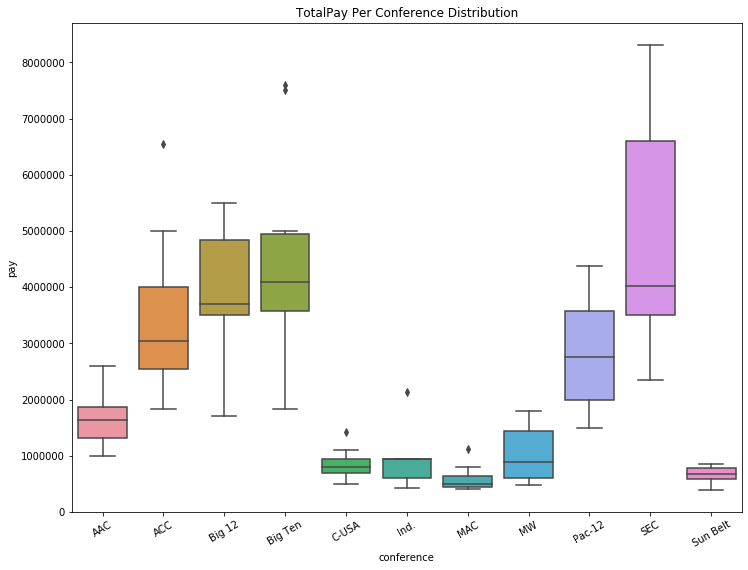

In [61]:
# Enlarge the plot

plt.figure(figsize=(12,9))

sns.boxplot(x = "conference", y = "pay", data = coachesDF, order = ordered_conf_names)
plt.title('TotalPay Per Conference Distribution')
# Rotate x-labels
plt.xticks(rotation=30)

In [62]:
# # Enlarge the plot
# plt.figure(figsize=(12,9))

# # Default boxplot
# sns.boxplot(data = coachesDF)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.]),
 <a list of 11 Text xticklabel objects>)

<Figure size 864x648 with 0 Axes>

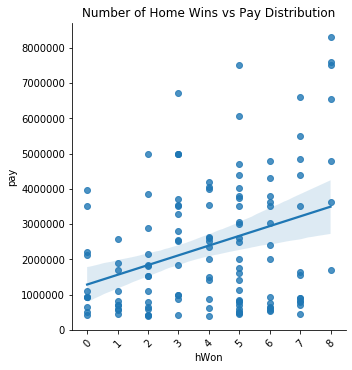

In [63]:
# Enlarge the plot
plt.figure(figsize=(12,9))

# Recommended way
sns.lmplot(x='hWon', y='pay', data=coachesDF)
plt.title('Number of Home Wins vs Pay Distribution')
# Rotate x-labels
plt.xticks(rotation=45)

In [64]:
type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

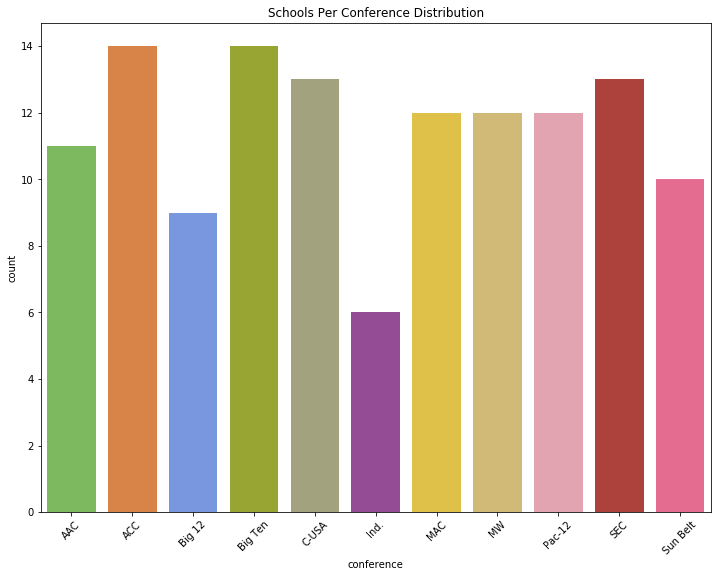

In [65]:
# Enlarge the plot
plt.figure(figsize=(12,9))

# Count Plot (a.k.a. Bar Plot) Number of Schools per Conference
sns.countplot(x='conference', data=coachesDF,palette=type_colors, order = ordered_conf_names) 
plt.title('Schools Per Conference Distribution')
# Rotate x-labels
plt.xticks(rotation=45)

plt.show()

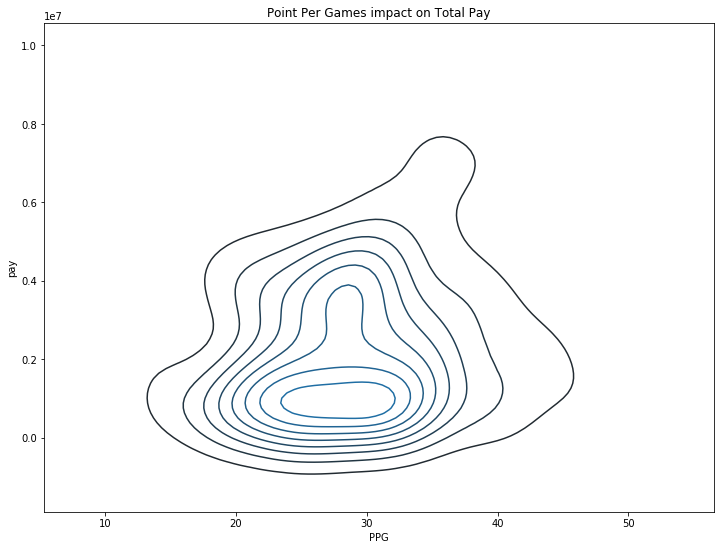

In [66]:
# Enlarge the plot
plt.figure(figsize=(12,9))

plt.title('Point Per Games impact on Total Pay')
# Density Plot
sns.kdeplot(coachesDF.PPG,coachesDF.pay)

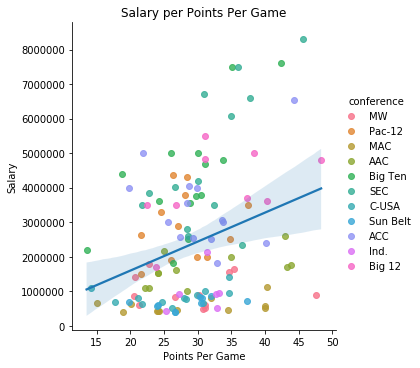

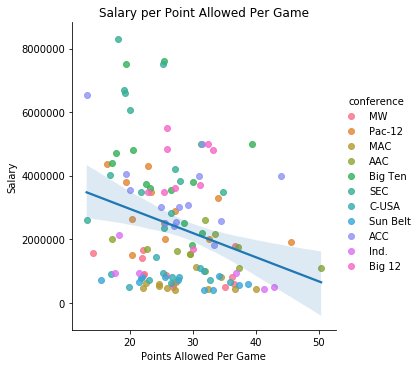

In [67]:
# Points Scored Per Game
g = sns.lmplot(x='PPG', y='pay', data=coachesDF, hue='conference', fit_reg=False)
sns.regplot(x='PPG', y='pay', data=coachesDF, scatter=False, ax=g.axes[0,0])
_ = plt.xlabel('Points Per Game')
_ = plt.ylabel('Salary')
_ = plt.title('Salary per Points Per Game')
plt.show()

# Points Allowed Per Game
h = sns.lmplot(x='PAG', y='pay', data=coachesDF, hue='conference', fit_reg=False)
sns.regplot(x='PAG', y='pay', data=coachesDF, scatter=False, ax=h.axes[0,0])
_ = plt.xlabel('Points Allowed Per Game')
_ = plt.ylabel('Salary')
_ = plt.title('Salary per Point Allowed Per Game')
plt.show()

<Figure size 1440x648 with 0 Axes>

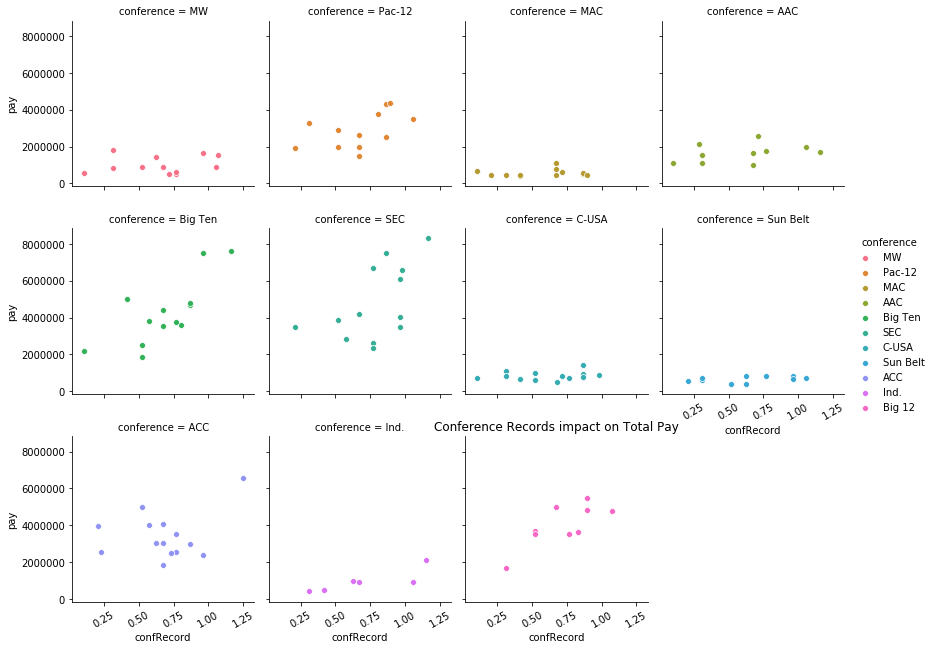

In [68]:
# Enlarge the plot
plt.figure(figsize=(20,9))

g = sns.FacetGrid(coachesDF, col = "conference", hue = "conference", col_wrap=4)
g.map(sns.scatterplot, "confRecord", "pay")
plt.title('Conference Records impact on Total Pay')
g.set_xticklabels(rotation=30)
g.add_legend()

plt.show()

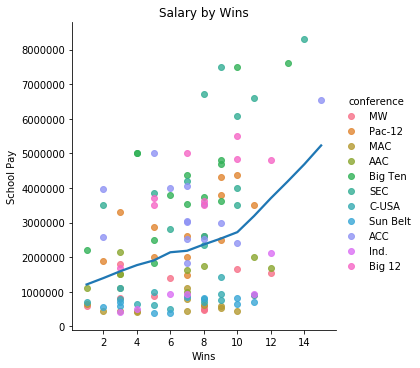

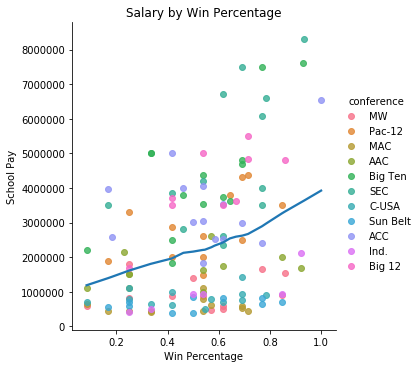

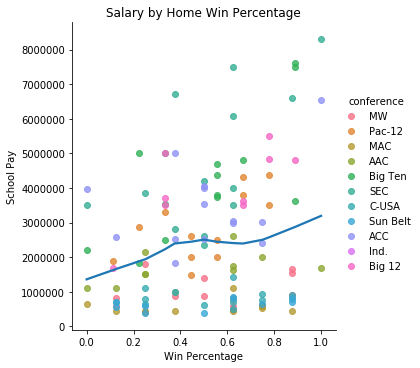

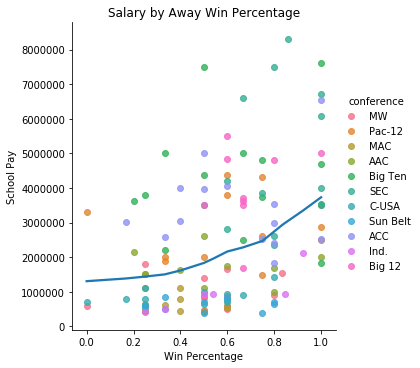

In [69]:
# Build an lm plot with loess regression.
# Lowess plot of total pay by number of conference wins
g = sns.lmplot(x='confWon', y='pay', data=coachesDF, hue='conference', fit_reg=False)
sns.regplot(x='confWon', y='pay', data=coachesDF, scatter=False, ax=g.axes[0,0], lowess=True)
_ = plt.title('Salary by Wins')
_ = plt.xlabel('Wins')
_ = plt.ylabel('School Pay')
plt.show()

# Total pay by conference record
h = sns.lmplot(x='confRecord', y='pay', data=coachesDF, hue='conference', fit_reg=False)
sns.regplot(x='confRecord', y='pay', data=coachesDF, scatter=False, ax=h.axes[0,0], lowess=True)
_ = plt.title('Salary by Win Percentage')
_ = plt.xlabel('Win Percentage')
_ = plt.ylabel('School Pay')
plt.show()

# Total pay by home record
i = sns.lmplot(x='home', y='pay', data=coachesDF, hue='conference', fit_reg=False)
sns.regplot(x='home', y='pay', data=coachesDF, scatter=False, ax=i.axes[0,0], lowess=True)
_ = plt.title('Salary by Home Win Percentage')
_ = plt.xlabel('Win Percentage')
_ = plt.ylabel('School Pay')
plt.show()

# Total pay by away record
i = sns.lmplot(x='away', y='pay', data=coachesDF, hue='conference', fit_reg=False)
sns.regplot(x='away', y='pay', data=coachesDF, scatter=False, ax=i.axes[0,0], lowess=True)
_ = plt.title('Salary by Away Win Percentage')
_ = plt.xlabel('Win Percentage')
_ = plt.ylabel('School Pay')
plt.show()

## Model Building

Its time to build the model to pridict the total pay given the variables created so far. However, as the first step lets focus on the feature engineering. we'll create a feature_names array and set the target array. We'll then split the data into three sets:  
* Training set containing 67 percent of the data
* Test set containing 33 percent of the data
* Validation set that will contain only one observation: the Syracuse coach position. 

We'll test and adjust the model trying to produce the best model we can, wanting to find a negotiation range of salaries that we could ideally offer the Syracuse coach and negotiate from there. 

In [70]:
coachesDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 125
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   coach         126 non-null    object 
 1   school        126 non-null    object 
 2   type          126 non-null    object 
 3   stateName     126 non-null    object 
 4   city          126 non-null    object 
 5   conference    126 non-null    object 
 6   capacity      126 non-null    int64  
 7   hWon          126 non-null    int64  
 8   hLoss         126 non-null    int64  
 9   confWon       126 non-null    int64  
 10  confLoss      126 non-null    int64  
 11  pFor          126 non-null    int64  
 12  pAgainst      126 non-null    int64  
 13  gsr           126 non-null    float64
 14  fsr           126 non-null    float64
 15  enrollment    126 non-null    int64  
 16  rank          126 non-null    int64  
 17  previousrank  126 non-null    int64  
 18  pay           126 non-null    

In [71]:
# Select the variables that will be used in the model, aswell as some additional variables that will be 
# kept to better identify the observations. 
coaches_model = coachesDF[['coach', 'school', 'conference', 'pay', 'confWon', 'confLoss', 'pFor', 'pAgainst', 
                      'gsr', 'fsr', 'capacity', 'away', 'PPG', 'PAG', 'OffRating', 'DefRating']]

# Of these columns, the only column that is not numeric and will be used in the model is Conference. 
# We'll use the LabelEncoder function to convert it into numeric. 
le = LabelEncoder()
coaches_model.loc[:, 'conference'] = le.fit_transform(coaches_model['conference'])

coaches_model.head()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,coach,school,conference,pay,confWon,confLoss,pFor,pAgainst,gsr,fsr,capacity,away,PPG,PAG,OffRating,DefRating
0,Troy Calhoun,Air Force,7,885000.0,5,7,363,309,0.0,0.0,52237,0.50,30.250000,25.750000,0.047693,-0.198309
1,Mike MacIntyre,Colorado,8,2878500.0,5,7,325,327,0.0,0.0,0,1.00,27.083333,27.250000,-0.015935,-0.102293
2,Mike Bobo,Colorado State,7,1800000.0,3,9,274,441,73.0,61.0,34400,0.25,22.833333,36.750000,-0.188121,0.184300
3,Terry Bowden,Akron,6,412500.0,4,8,227,326,72.0,61.0,30000,0.50,18.916667,27.166667,-0.386654,-0.105072
4,Mike Jinks,Bowling Green,6,437228.0,3,9,292,480,82.0,68.0,23724,0.25,24.333333,40.000000,-0.208410,0.313406


In [72]:
# Select the feature_names variables and the target variable. This will facilitate the creation of the 
# training and testing sets. 
feature_names = ['conference','confWon','confLoss','pFor','pAgainst','gsr','fsr', 'capacity','away','PPG',
                 'PAG','OffRating', 'DefRating']
target_name = ['pay']

# We'll now take out the validation set. 
validation = coaches_model[coaches_model['school']=='Syracuse']
coaches_model2 = coaches_model[coaches_model['school']!='Syracuse']

# Build training and testing sets
X_train, X_test, y_train, y_test = train_test_split(coaches_model2[feature_names], coaches_model2[target_name], 
                                                   test_size=0.33, random_state=42)

In [73]:
# Builds the model
model = sm.OLS(y_train, X_train)

# Fits the model
results = model.fit()

# Model results
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pay   R-squared (uncentered):                   0.877
Model:                            OLS   Adj. R-squared (uncentered):              0.854
Method:                 Least Squares   F-statistic:                              38.28
Date:                Sat, 24 Apr 2021   Prob (F-statistic):                    1.33e-26
Time:                        22:12:52   Log-Likelihood:                         -1267.3
No. Observations:                  83   AIC:                                      2561.
Df Residuals:                      70   BIC:                                      2592.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Model 1 R-squared:  0.6269764714414254
Model 1 RMSE:  1261402.7009766602
Model 1 MAE:  968217.237581489


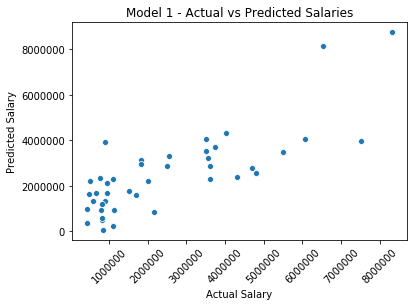

In [74]:
# Predict salaries for first model
prediction = results.predict(X_test)
prediction = pd.Series(prediction)

prediction_results = pd.concat([y_test, prediction], axis=1, ignore_index=False)
prediction_results.columns = ['Pay Actual', 'Pay Predicted']

print('Model 1 R-squared: ', r2_score(prediction_results['Pay Actual'], 
                                      prediction_results['Pay Predicted']))
print('Model 1 RMSE: ', np.sqrt(mean_squared_error(prediction_results['Pay Actual'], 
                                                   prediction_results['Pay Predicted'])))
print('Model 1 MAE: ', mean_absolute_error(prediction_results['Pay Actual'], 
                                           prediction_results['Pay Predicted']))
sns.scatterplot(x='Pay Actual', y='Pay Predicted', data=prediction_results)
_ = plt.title('Model 1 - Actual vs Predicted Salaries')
_ = plt.xlabel('Actual Salary')
_ = plt.ylabel('Predicted Salary')
# Rotate x-labels
plt.xticks(rotation=45)
plt.show()

In [75]:
# We'll remove GSR and FSR from the input variables as they are not significant to the model. 

# Select the feature_names variables and the target variable. This will facilitate the creation of the 
# training and testing sets. 
feature_names2 = ['conference','confWon','confLoss','pFor','pAgainst', 'capacity','away','PPG',
                 'PAG','OffRating', 'DefRating']
target_name = ['pay']

# Build training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(coaches_model2[feature_names2], coaches_model2[target_name], 
                                                   test_size=0.33, random_state=42)

In [76]:
# Builds the model
model2 = sm.OLS(y_train2, X_train2)

# Fits the model
results2 = model2.fit()

# Model results
print(results2.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pay   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.856
Method:                 Least Squares   F-statistic:                              45.85
Date:                Sat, 24 Apr 2021   Prob (F-statistic):                    4.49e-28
Time:                        22:12:53   Log-Likelihood:                         -1267.9
No. Observations:                  83   AIC:                                      2558.
Df Residuals:                      72   BIC:                                      2584.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Model 2 R-squared:  0.610046492627391
Model 2 RMSE:  1289709.975785799
Model 2 MAE:  961189.4440166235


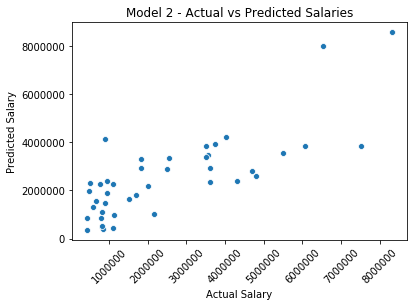

In [77]:
# Predict salaries for second model
prediction2 = results2.predict(X_test2)
prediction2 = pd.Series(prediction2)

prediction_results2 = pd.concat([y_test2, prediction2], axis=1, ignore_index=False)
prediction_results2.columns = ['Pay Actual', 'Pay Predicted']

print('Model 2 R-squared: ', r2_score(prediction_results2['Pay Actual'], 
                                      prediction_results2['Pay Predicted']))
print('Model 2 RMSE: ', np.sqrt(mean_squared_error(prediction_results2['Pay Actual'], 
                                                   prediction_results2['Pay Predicted'])))
print('Model 2 MAE: ', mean_absolute_error(prediction_results2['Pay Actual'], 
                                           prediction_results2['Pay Predicted']))
sns.scatterplot(x='Pay Actual', y='Pay Predicted', data=prediction_results2)
_ = plt.title('Model 2 - Actual vs Predicted Salaries')
_ = plt.xlabel('Actual Salary')
_ = plt.ylabel('Predicted Salary')
plt.xticks(rotation=45)
plt.show()

In [78]:
# Remove ConfW, ConfL, PF, PA, and AwayRecord from the input variables. 

# Select the feature_names variables and the target variable. This will facilitate the creation of the 
# training and testing sets. 
feature_names3 = ['conference','capacity','PPG','PAG','OffRating','DefRating']
target_name = ['pay']

# Build training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(coaches_model2[feature_names3], coaches_model2[target_name], 
                                                   test_size=0.33, random_state=42)

In [79]:
# Builds the model
model3 = sm.OLS(y_train3, X_train3)

# Fits the model
results3 = model3.fit()

# Model results
print(results3.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pay   R-squared (uncentered):                   0.859
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              78.48
Date:                Sat, 24 Apr 2021   Prob (F-statistic):                    9.22e-31
Time:                        22:12:53   Log-Likelihood:                         -1272.8
No. Observations:                  83   AIC:                                      2558.
Df Residuals:                      77   BIC:                                      2572.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Model 3 R-squared:  0.6220567042976821
Model 3 RMSE:  1269693.7054185204
Model 3 MAE:  941636.8755019044


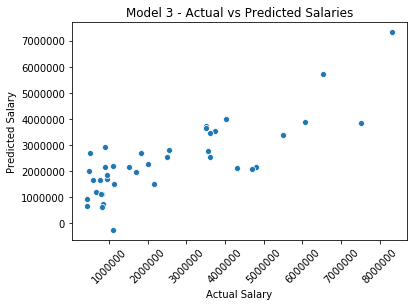

In [80]:
# Predict salaries for third model
prediction3 = results3.predict(X_test3)
prediction3 = pd.Series(prediction3)

prediction_results3 = pd.concat([y_test3, prediction3], axis=1, ignore_index=False)
prediction_results3.columns = ['Pay Actual', 'Pay Predicted']

print('Model 3 R-squared: ', r2_score(prediction_results3['Pay Actual'], 
                                      prediction_results3['Pay Predicted']))
print('Model 3 RMSE: ', np.sqrt(mean_squared_error(prediction_results3['Pay Actual'], 
                                                   prediction_results3['Pay Predicted'])))
print('Model 3 MAE: ', mean_absolute_error(prediction_results3['Pay Actual'], 
                                           prediction_results3['Pay Predicted']))
sns.scatterplot(x='Pay Actual', y='Pay Predicted', data=prediction_results3)
_ = plt.title('Model 3 - Actual vs Predicted Salaries')
_ = plt.xlabel('Actual Salary')
_ = plt.ylabel('Predicted Salary')
plt.xticks(rotation=45)
plt.show()

In [81]:
valid_predict = results.predict(validation[feature_names])
valid_predict2 = results2.predict(validation[feature_names2])
valid_predict3 = results3.predict(validation[feature_names3])

# Print results 
print('Actual Salary: ', validation['pay'])
print('Model 1 Prediction: %s' % np.round(valid_predict, 2))
print('Model 2 Prediction: %s' % np.round(valid_predict2, 2))
print('Model 3 Prediction: %s' % np.round(valid_predict3, 2))

Actual Salary:  30    2401206.0
Name: pay, dtype: float64
Model 1 Prediction: 30    3432186.18
dtype: float64
Model 2 Prediction: 30    3375482.75
dtype: float64
Model 3 Prediction: 30    3337402.98
dtype: float64


## Model Evaluation and Summary


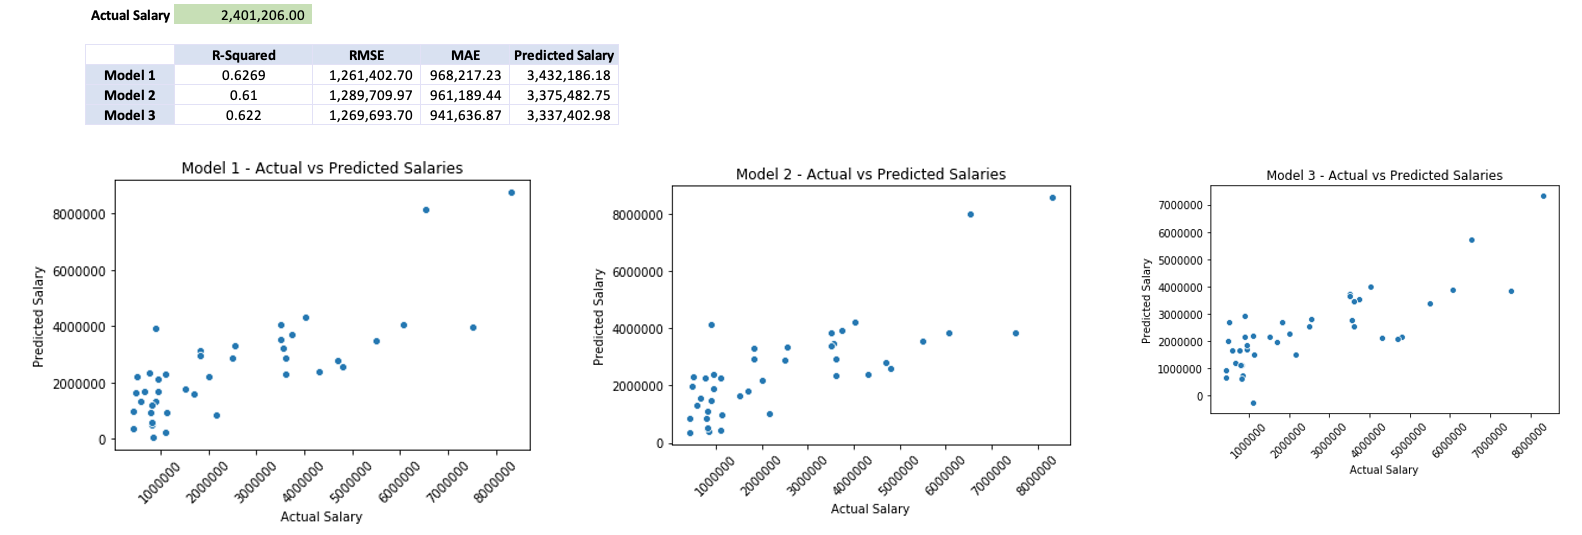

* Overall, We were able to perform analysis on the coaches data provided by obtaining additional data from NCAA for detailed analysis.

* Steps including Obtaining data from external sources, Scrubbing the data by removing unwanted columns, fixing the missing values, joining the datasets for a consolidated data set. Later, an exploratory analysis (discriptive analysis) on the dataset to identify the correlation between various variables and thier impact on total pay. 


* For Modeling, dataset is split into 67:33 split for training and test keeping the Syracuse record as validation.In addition, to predict the salary/Total Pay, I have used simple linear regression method (OLS) and three differnt models were built to predict. Based on the R-Squared, RMSE and MAE - Model 3 seems have better values than the other two.It included conference,stadium capacity,Points Scored Per Game,Points allowed per game,Offensive and defensive ratings against the Predictor variable. Having 2401206.0 as current salary, our model predicts the expected salary in the range of 3337402.98 and 3432186.18.

* Several visualization techniques were used including Barplots, density graphs, Geo Spatial and other histograms were also built to understand the data spread better.



* In addition, considering the impact on the Conference - additional validation were performed as with What-if scenarios
  * What happens if Syracuse Participate in Big Ten and Big 12 conferences.It suggests that expected salary of 3231128 if Syracuse performs better in these conferences.

In [82]:
validation

,coach,school,conference,pay,confWon,confLoss,pFor,pAgainst,gsr,fsr,capacity,away,PPG,PAG,OffRating,DefRating
30,Dino Babers,Syracuse,1,2401206.0,10,3,523,351,85.0,70.0,49250,0.8,40.230769,27.0,0.428726,-0.128464


In [83]:
validationBig12 = validation

# Big 12 == 2; Big Ten == 3
validationBig12.loc[:, 'conference'] = 2 

# Run model 3 for both Big 12 and Big Ten
salaryBig12 = results3.predict(validationBig12[feature_names3])

print('Big 12: %d' % salaryBig12)

Big 12: 3231128


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [84]:
validationBigTen = validation

# Big 12 == 2; Big Ten == 3
validationBigTen.loc[:, 'Conference'] = 3

# Run model 3 for both Big 12 and Big Ten
salaryBigTen = results3.predict(validationBigTen[feature_names3])

print('Big Ten: %d' % salaryBigTen)

Big Ten: 3231128


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


## Bonus Question

* Please find below, addditional models built as bonus sections. 
   * Linear Mixed Effect Model. However, after removing Conference variable from the independent variables group the R-Suared value reduced to 0.55
   
   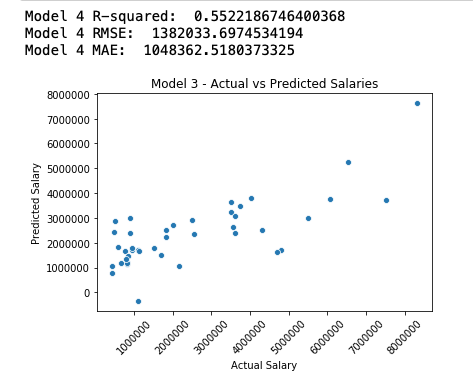

* As part of visualization, Geo map (Brokeh Plot) has been built to showcase the Pay across differnt states.

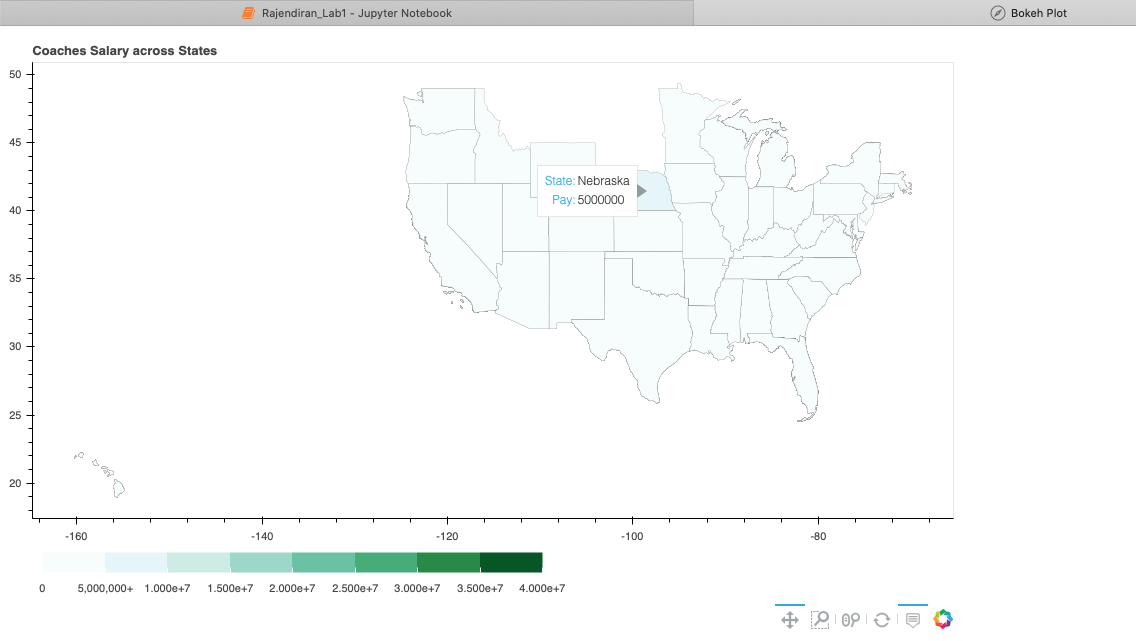

In [85]:
# Build a Linear Mixed Effect Model
mlm_model = sm.MixedLM(y_train3, X_train3, groups=X_train3["conference"])
mlm_results = mlm_model.fit()
print(mlm_results.summary())

                     Mixed Linear Model Regression Results
Model:                  MixedLM      Dependent Variable:      pay              
No. Observations:       83           Method:                  REML             
No. Groups:             11           Scale:                   928200707181.8478
Min. group size:        4            Log-Likelihood:          -1202.9455       
Max. group size:        10           Converged:               Yes              
Mean group size:        7.5                                                    
-------------------------------------------------------------------------------
                Coef.         Std.Err.    z    P>|z|     [0.025       0.975]   
-------------------------------------------------------------------------------
conference      -104754.230   76334.989 -1.372 0.170   -254368.058    44859.599
capacity             15.481       5.018  3.085 0.002         5.645       25.317
PPG             -264968.053   72746.536 -3.642 0.000   -40754

LME R-squared:  0.6428591240847977
LME RMSE:  1234256.500892725
LME MAE:  930080.3094869584


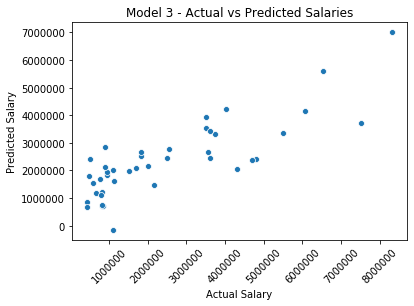

In [86]:
# Predict salaries for the linear mixed effect model
mlm_prediction = mlm_results.predict(X_test3)
mlm_prediction = pd.Series(mlm_prediction)

mlm_prediction = pd.concat([y_test3, mlm_prediction], axis=1, ignore_index=False)
mlm_prediction.columns = ['Pay Actual', 'Pay Predicted']

print('LME R-squared: ', r2_score(mlm_prediction['Pay Actual'], 
                                      mlm_prediction['Pay Predicted']))
print('LME RMSE: ', np.sqrt(mean_squared_error(mlm_prediction['Pay Actual'], 
                                                   mlm_prediction['Pay Predicted'])))
print('LME MAE: ', mean_absolute_error(mlm_prediction['Pay Actual'], 
                                           mlm_prediction['Pay Predicted']))
sns.scatterplot(x='Pay Actual', y='Pay Predicted', data=mlm_prediction)
_ = plt.title('Model 3 - Actual vs Predicted Salaries')
_ = plt.xlabel('Actual Salary')
_ = plt.ylabel('Predicted Salary')
plt.xticks(rotation=45)
plt.show()

In [87]:
# Remove Conference from the third model

# Select the feature_names variables and the target variable. This will facilitate the creation of the 
# training and testing sets. 
feature_names4 = ['capacity','PPG','PAG','OffRating','DefRating']
target_name = ['pay']

# Build training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(coaches_model2[feature_names4], coaches_model2[target_name], 
                                                   test_size=0.33, random_state=42)

# Builds the model
model4 = sm.OLS(y_train4, X_train4)

# Fits the model
results4 = model4.fit()

# Model results
print(results4.summary())

                                 OLS Regression Results                                
Dep. Variable:                    pay   R-squared (uncentered):                   0.848
Model:                            OLS   Adj. R-squared (uncentered):              0.838
Method:                 Least Squares   F-statistic:                              86.73
Date:                Sat, 24 Apr 2021   Prob (F-statistic):                    2.10e-30
Time:                        22:12:53   Log-Likelihood:                         -1276.1
No. Observations:                  83   AIC:                                      2562.
Df Residuals:                      78   BIC:                                      2574.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Model 4 R-squared:  0.5522186746400368
Model 4 RMSE:  1382033.6974534194
Model 4 MAE:  1048362.5180373325


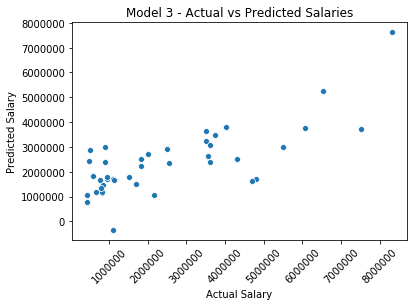

In [88]:
# Predict salaries for third model
prediction4 = results4.predict(X_test4)
prediction4 = pd.Series(prediction4)

prediction_results4 = pd.concat([y_test4, prediction4], axis=1, ignore_index=False)
prediction_results4.columns = ['Pay Actual', 'Pay Predicted']

print('Model 4 R-squared: ', r2_score(prediction_results4['Pay Actual'], 
                                      prediction_results4['Pay Predicted']))
print('Model 4 RMSE: ', np.sqrt(mean_squared_error(prediction_results4['Pay Actual'], 
                                                   prediction_results4['Pay Predicted'])))
print('Model 4 MAE: ', mean_absolute_error(prediction_results4['Pay Actual'], 
                                           prediction_results4['Pay Predicted']))
sns.scatterplot(x='Pay Actual', y='Pay Predicted', data=prediction_results4)
_ = plt.title('Model 3 - Actual vs Predicted Salaries')
_ = plt.xlabel('Actual Salary')
_ = plt.ylabel('Predicted Salary')
plt.xticks(rotation=45)
plt.show()

In [89]:
# coachesDF.head()

In [90]:
# !pip install geopandas

In [91]:
# Import geopandas package
import geopandas as gpd
# Read in shapefile and examine data
contiguous_usa = gpd.read_file(fpath+'cb_2018_us_state_20m.shp')
# contiguous_usa.head()

In [92]:
coachesDF.stateName.unique()

array(['Colorado', 'Ohio', 'Alabama', 'North Carolina', 'Arizona',
       'Arkansas', 'New York', 'Indiana', 'Idaho', 'Massachusetts',
       'California', 'Florida', 'Michigan', 'South Carolina',
       'Connecticut', 'Georgia', 'Hawaii', 'Texas', 'Illinois', 'Iowa',
       'Kansas', 'Kentucky', 'Virginia', 'Louisiana', 'West Virginia',
       'Maryland', 'Tennessee', 'Minnesota', 'Mississippi', 'Missouri',
       'Nebraska', 'Nevada', 'New Mexico', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'New Jersey', 'Utah', 'Washington', 'Wisconsin',
       'Wyoming'], dtype=object)

In [93]:
# Merge shapefile with population data
pop_states = contiguous_usa.merge(coachesDF, left_on = 'NAME', right_on = 'stateName')

In [94]:
# pop_states

In [95]:
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
# Input GeoJSON source that contains features for plotting
geosource = GeoJSONDataSource(geojson = pop_states.to_json())

In [96]:
# Create figure object.
# p = figure(title = 'Coaches Salary across States', 
#            plot_height = 600 ,
#            plot_width = 950, 
#            toolbar_location = 'below',
#            tools = "pan, wheel_zoom, box_zoom, reset")
# p.xgrid.grid_line_color = None
# p.ygrid.grid_line_color = None
# # Add patch renderer to figure.
# states = p.patches('xs','ys', source = geosource,
#                    fill_color = None,
#                    line_color = "gray", 
#                    line_width = 0.25, 
#                    fill_alpha = 1)
# # Create hover tool
# p.add_tools(HoverTool(renderers = [states],
#                       tooltips = [('State','@NAME'),
#                                 ('Pay','@pay')]))
# show(p)

In [97]:
# Define color palettes
palette = brewer['BuGn'][8]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40000000)
# Define custom tick labels for color bar.
tick_labels = {"0": "0", 
               "100000": "100,000",
               "500000":"500,000",
               "700000":"700,000",
               "900000":"900,000", 
               "1000000":"1,000,000",
               "2000000":"2,000,000", 
               "3500000":"3,500,000",
               "5000000":"5,000,000+"}
# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 500, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = "horizontal",
                     major_label_overrides = tick_labels)
# Create figure object.
p = figure(title = "Coaches Salary across States", 
           plot_height = 600, plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
# Add patch renderer to figure.
states = p.patches('xs','ys', source = geosource,
                   fill_color = {'field' :'pay',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)
# Create hover tool
p.add_tools(HoverTool(renderers = [states],
                      tooltips = [('State','@NAME'),
                               ('Pay', '@pay')]))
# Specify layout
p.add_layout(color_bar, 'below')
show(p)